In [8]:
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import torch
from utils import make_sequences

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pandas as pd
import numpy as np



# import everything needed for plotly
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import os

In [2]:
# load train, val, and test data as splits
train_dfs = torch.load('../data/processed/train_dfs.pt')
val_dfs = torch.load('../data/processed/val_dfs.pt')
test_df = torch.load('../data/processed/test_df.pt')

# concatenate the dataframes
train_df = pd.concat(train_dfs)[test_df.columns[:-1]] 
val_df = pd.concat(val_dfs)[test_df.columns[:-1]] # val dfs consits of 4 dfs
test_df = test_df[test_df.columns[:-1]]
test_df

DMA A (L/s)  DMA B (L/s)  DMA C (L/s)  DMA D (L/s)  \
2022-03-06 00:00:00+00:00    -1.220385    -1.307913    -1.376673    -0.982351   
2022-03-06 01:00:00+00:00    -1.312412    -1.328291    -1.473331    -0.896767   
2022-03-06 02:00:00+00:00    -1.232655    -1.424748    -1.545386    -0.651718   
2022-03-06 03:00:00+00:00    -1.109952    -1.382633    -1.513752    -0.978327   
2022-03-06 04:00:00+00:00    -1.146763    -1.313347    -1.487391    -1.008318   
...                                ...          ...          ...          ...   
2023-03-05 18:00:00+00:00    -0.529743     0.031605    -0.466324     0.495253   
2023-03-05 19:00:00+00:00    -0.425446     0.123986    -0.418874     0.104273   
2023-03-05 20:00:00+00:00    -0.485045    -0.055341    -0.867018     0.058555   
2023-03-05 21:00:00+00:00     0.235396    -0.405844    -1.306375     0.013569   
2023-03-05 22:00:00+00:00     2.433529    -0.662608    -1.584049    -0.952725   

                           DMA E (L/s)  DMA F (L/s)  DMA G (L/s)  DMA H (L/s)  \
2022-03-06 00:00:00+00:00    -1.451542     0.006536    -1.150483    -1.048887   
2022-03-06 01:00:00+00:00    -1.591432     0.234695    -1.334735    -1.299247   
2022-03-06 02:00:00+00:00    -1.614992     0.320837    -1.256406    -1.328399   
2022-03-06 03:00:00+00:00    -1.646733    -0.158763    -1.282664    -1.248661   
2022-03-06 04:00:00+00:00    -1.556910    -0.163419    -1.262192    -1.204934   
...                                ...          ...          ...          ...   
2023-03-05 18:00:00+00:00     1.033748     2.337019     1.217652     1.625334   
2023-03-05 19:00:00+00:00     0.925272     2.161244     1.055207     1.368972   
2023-03-05 20:00:00+00:00     0.450629     1.721222     0.986669     0.895689   
2023-03-05 21:00:00+00:00    -0.006016     1.335913     0.471741     0.643614   
2023-03-05 22:00:00+00:00    -0.434193     0.608364     0.265236     0.223490   

                           DMA I (L/s)  DMA J (L/s)  
2022-03-06 00:00:00+00:00    -1.635612    -1.653881  
2022-03-06 01:00:00+00:00    -1.559179    -1.728973  
2022-03-06 02:00:00+00:00    -1.586595    -1.754572  
2022-03-06 03:00:00+00:00    -1.638105    -1.788136  
2022-03-06 04:00:00+00:00    -1.285847    -1.437140  
...                                ...          ...  
2023-03-05 18:00:00+00:00     0.839332    -1.260219  
2023-03-05 19:00:00+00:00     0.863425    -1.249411  
2023-03-05 20:00:00+00:00     0.565169    -1.699391  
2023-03-05 21:00:00+00:00     1.527231    -1.133929  
2023-03-05 22:00:00+00:00     1.345287    -1.400163  

[8759 rows x 10 columns]

In [3]:
# concatenate the dataframes
train_df = pd.concat(train_dfs)[test_df.columns[:-1]] 
val_df = pd.concat(val_dfs)[test_df.columns[:-1]] # val dfs consits of 4 dfs
test_df = test_df[test_df.columns[:-1]]
test_df

DMA A (L/s)  DMA B (L/s)  DMA C (L/s)  DMA D (L/s)  \
2022-03-06 00:00:00+00:00    -1.220385    -1.307913    -1.376673    -0.982351   
2022-03-06 01:00:00+00:00    -1.312412    -1.328291    -1.473331    -0.896767   
2022-03-06 02:00:00+00:00    -1.232655    -1.424748    -1.545386    -0.651718   
2022-03-06 03:00:00+00:00    -1.109952    -1.382633    -1.513752    -0.978327   
2022-03-06 04:00:00+00:00    -1.146763    -1.313347    -1.487391    -1.008318   
...                                ...          ...          ...          ...   
2023-03-05 18:00:00+00:00    -0.529743     0.031605    -0.466324     0.495253   
2023-03-05 19:00:00+00:00    -0.425446     0.123986    -0.418874     0.104273   
2023-03-05 20:00:00+00:00    -0.485045    -0.055341    -0.867018     0.058555   
2023-03-05 21:00:00+00:00     0.235396    -0.405844    -1.306375     0.013569   
2023-03-05 22:00:00+00:00     2.433529    -0.662608    -1.584049    -0.952725   

                           DMA E (L/s)  DMA F (L/s)  DMA G (L/s)  DMA H (L/s)  \
2022-03-06 00:00:00+00:00    -1.451542     0.006536    -1.150483    -1.048887   
2022-03-06 01:00:00+00:00    -1.591432     0.234695    -1.334735    -1.299247   
2022-03-06 02:00:00+00:00    -1.614992     0.320837    -1.256406    -1.328399   
2022-03-06 03:00:00+00:00    -1.646733    -0.158763    -1.282664    -1.248661   
2022-03-06 04:00:00+00:00    -1.556910    -0.163419    -1.262192    -1.204934   
...                                ...          ...          ...          ...   
2023-03-05 18:00:00+00:00     1.033748     2.337019     1.217652     1.625334   
2023-03-05 19:00:00+00:00     0.925272     2.161244     1.055207     1.368972   
2023-03-05 20:00:00+00:00     0.450629     1.721222     0.986669     0.895689   
2023-03-05 21:00:00+00:00    -0.006016     1.335913     0.471741     0.643614   
2023-03-05 22:00:00+00:00    -0.434193     0.608364     0.265236     0.223490   

                           DMA I (L/s)  
2022-03-06 00:00:00+00:00    -1.635612  
2022-03-06 01:00:00+00:00    -1.559179  
2022-03-06 02:00:00+00:00    -1.586595  
2022-03-06 03:00:00+00:00    -1.638105  
2022-03-06 04:00:00+00:00    -1.285847  
...                                ...  
2023-03-05 18:00:00+00:00     0.839332  
2023-03-05 19:00:00+00:00     0.863425  
2023-03-05 20:00:00+00:00     0.565169  
2023-03-05 21:00:00+00:00     1.527231  
2023-03-05 22:00:00+00:00     1.345287  

[8759 rows x 9 columns]

/tmp/ipykernel_83054/3023854001.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_83054/3023854001.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_83054/3023854001.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

<Axes: xlabel='Date-time CET-CEST (DD/MM/YYYY HH:mm)'>

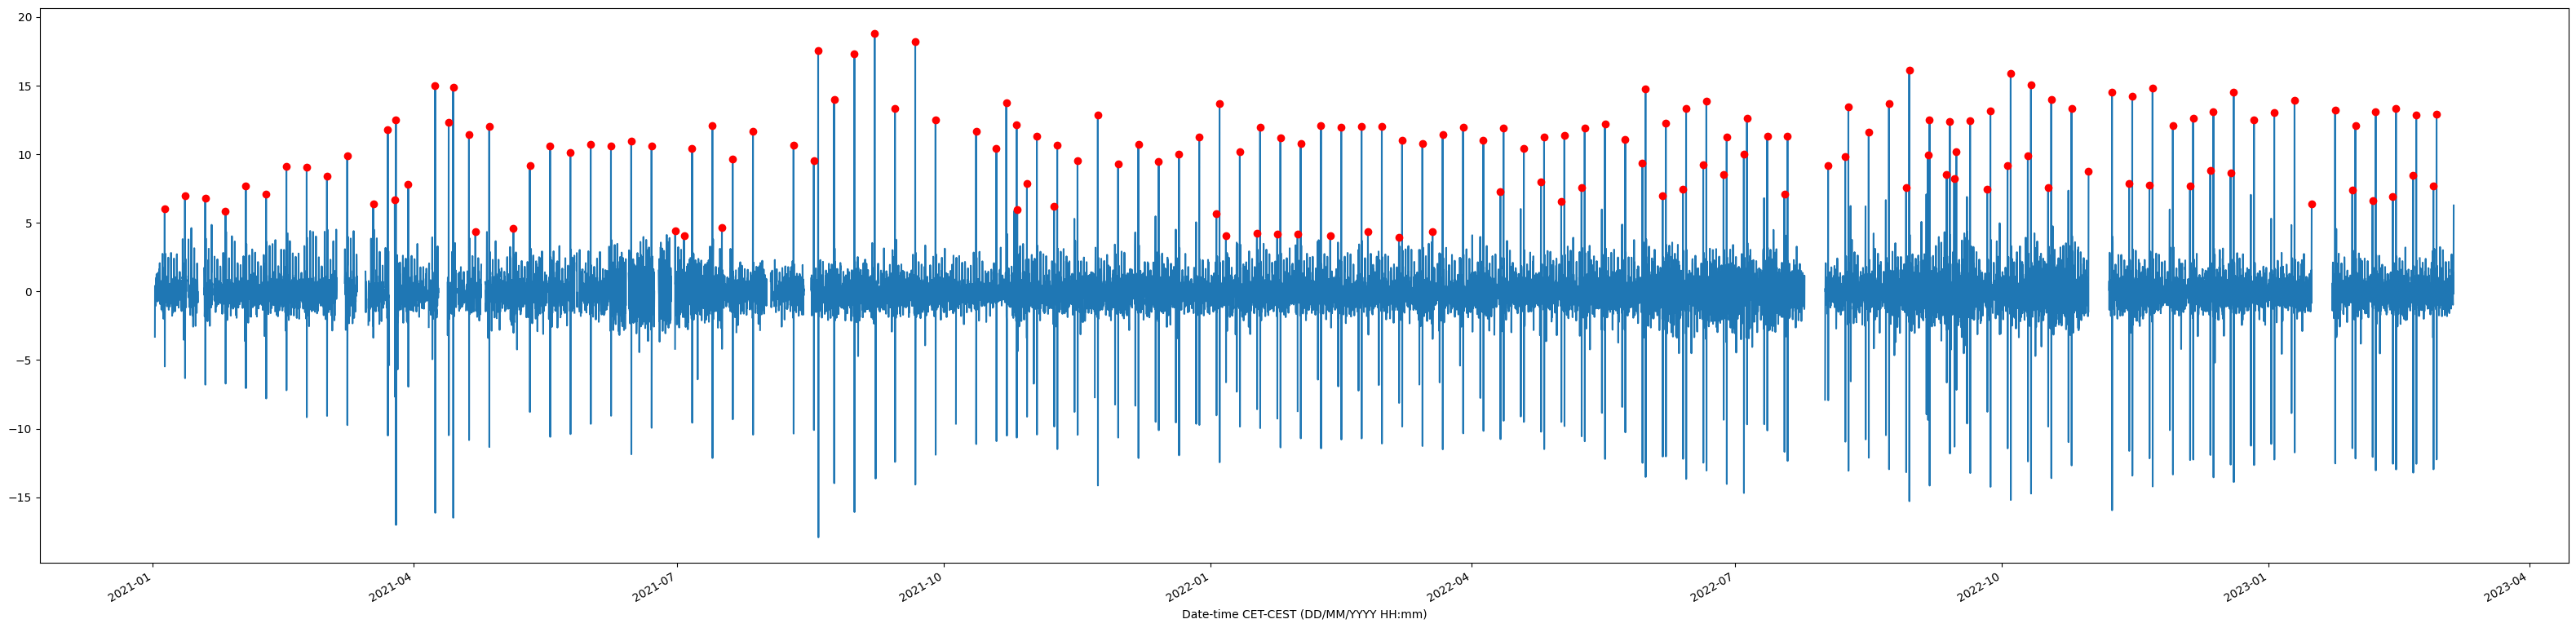

In [10]:

test_df = pd.read_excel(r'../data/raw/WDSA/Inflow_Data_4.xlsx', index_col=0, parse_dates=True, date_format='%d/%m/%Y %H:%M')
def indexer(indexlist, df, col):
    min_index = indexlist[0]
    max_index = indexlist[-1]
    return torch.Tensor(df.loc[min_index:max_index, col].copy().to_numpy())

test_df_a = test_df[['DMA A (L/s)']].copy()
test_df_a_not_diffed = test_df_a.copy()
test_df_a = test_df_a.diff()

qs = [0.99]*9
qs[0] = 0.992
qs[1] = 0.992
qs[2] = 0.993
qs[3] = 0.993
qs[4] = 0.99

diffeds = []

grouped = test_df_a.groupby(pd.Grouper(freq='QE'))

for i,(name, group) in enumerate(grouped):
    quantile_value = group['DMA A (L/s)'].quantile(qs[i])
    group['outliers'] = group['DMA A (L/s)'] > quantile_value
    diffeds.append(group)
diffeds = pd.concat(diffeds)

diffeds = diffeds[~diffeds.index.duplicated(keep='first')]
diffeds['outlier_val'] = np.nan
diffeds['outlier_val'][diffeds['outliers']] = diffeds['DMA A (L/s)'][diffeds['outliers']]

test_df_a_not_diffed['outlier_val'] =   np.nan
test_df_a_not_diffed['outlier_val'][diffeds['outliers']] = test_df_a_not_diffed['DMA A (L/s)'][diffeds['outliers']]

test_df_a_not_diffed['weekday'] = test_df_a.index.weekday
test_df_a_not_diffed['weekday'][~test_df_a_not_diffed['outlier_val'].notna()] = None

fig, ax = plt.subplots(figsize=(40, 10))
diffeds['DMA A (L/s)'].plot(ax=ax, label='DMA A (L/s)')
diffeds['outlier_val'].plot(ax=ax, color='r', marker='o', linestyle='None')


In [11]:
# count each unique value in test_df_a_not_diffed['weekday']
weekday_counts = test_df_a_not_diffed['weekday'].value_counts()

/tmp/ipykernel_83054/2420328145.py:2: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/tmp/ipykernel_83054/2420328145.py:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



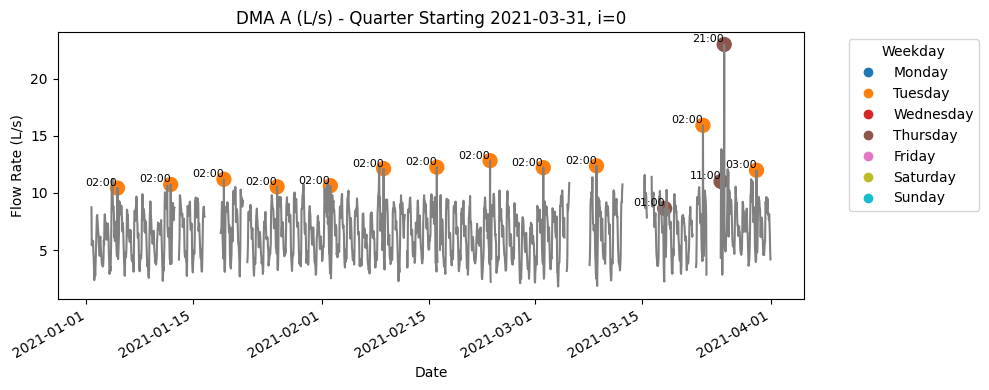

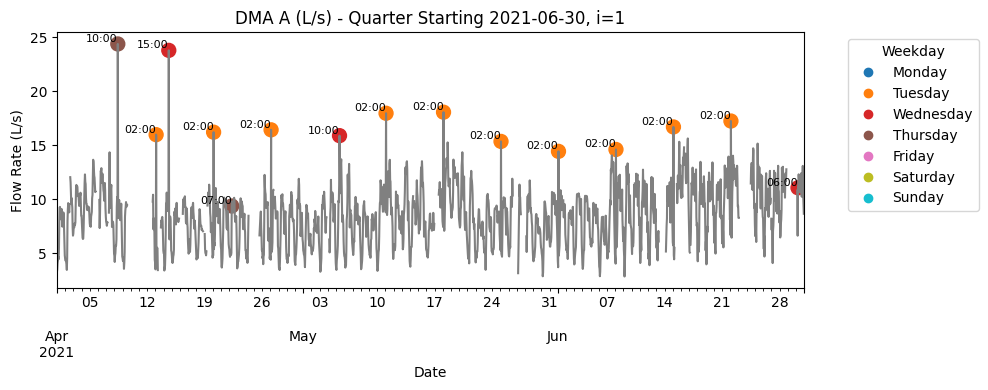

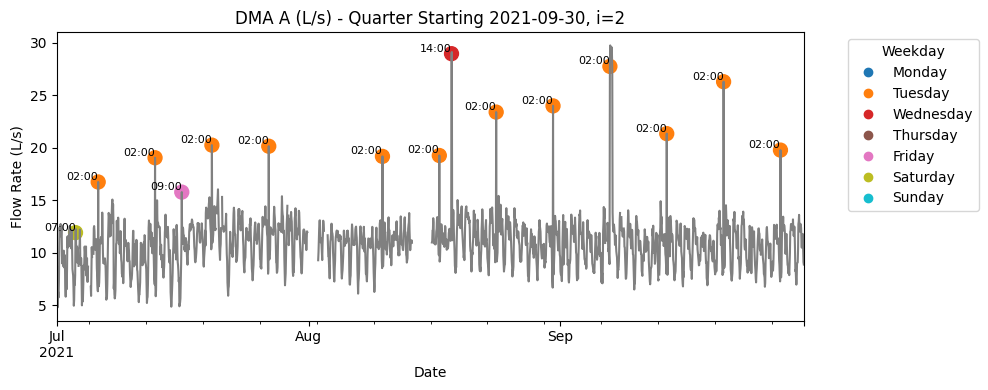

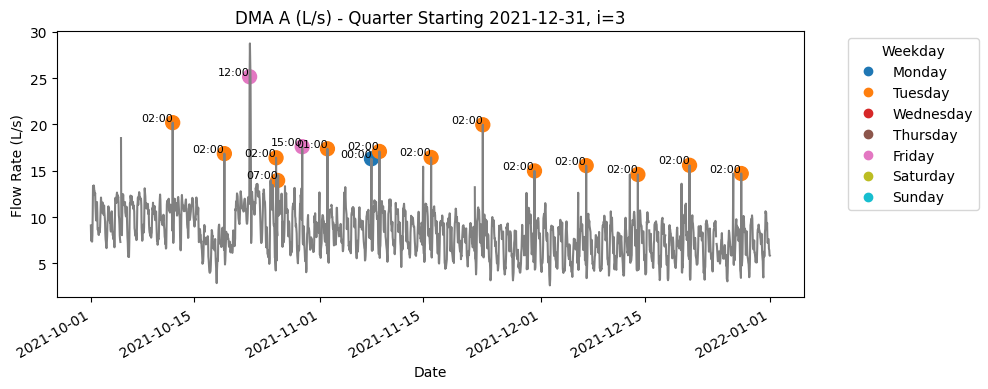

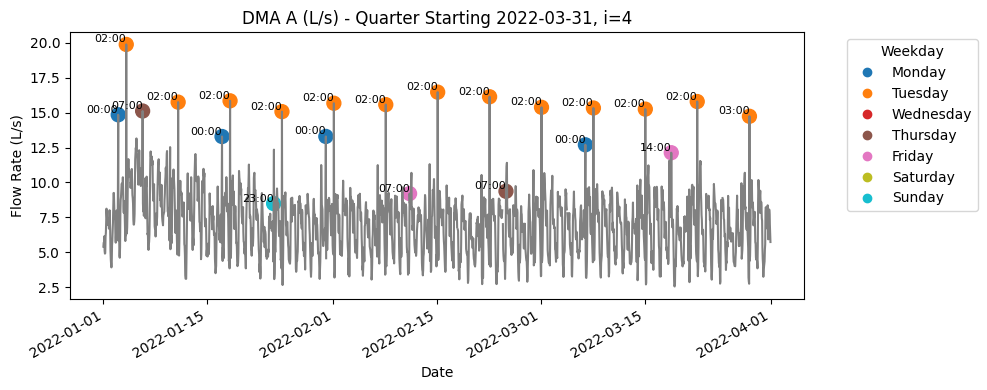

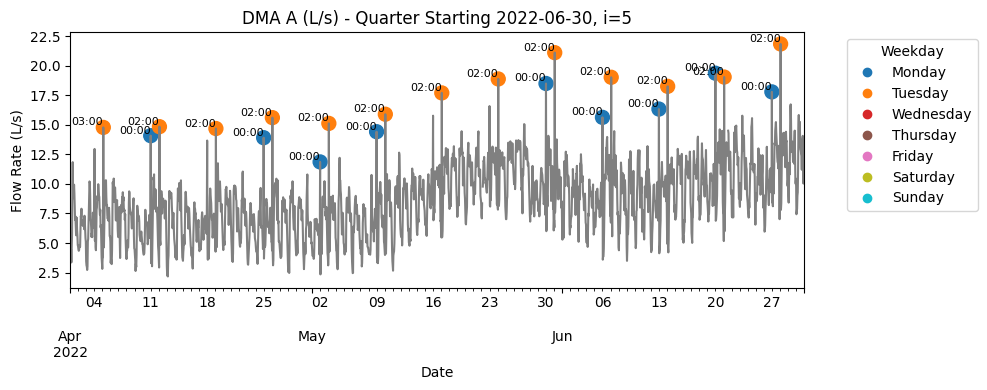

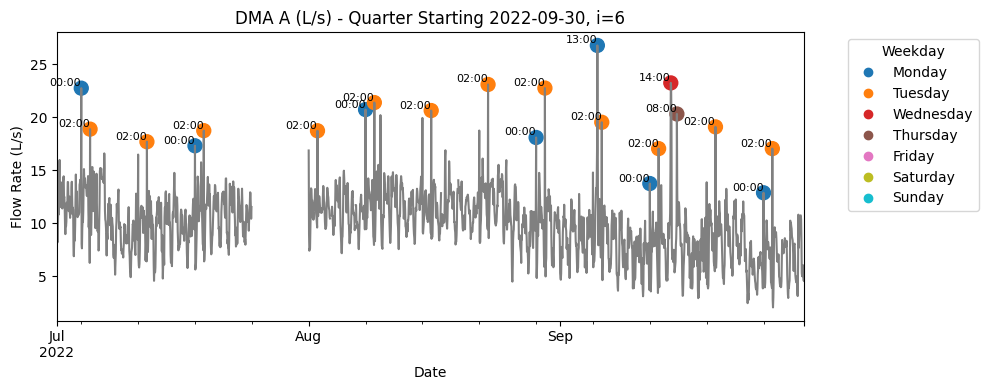

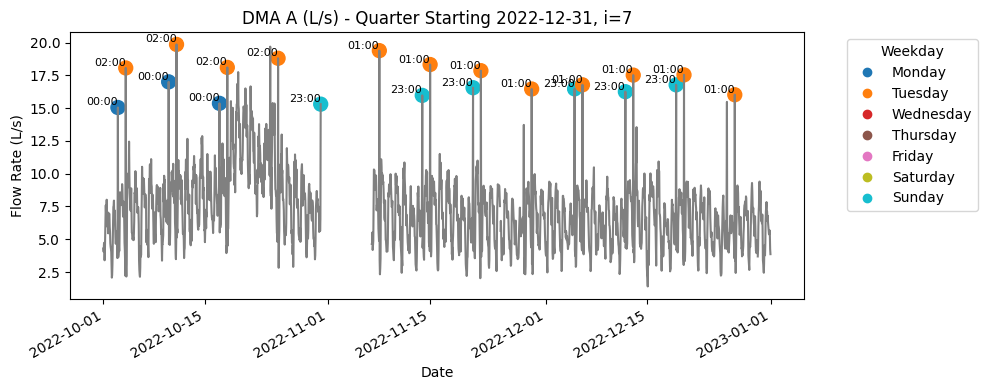

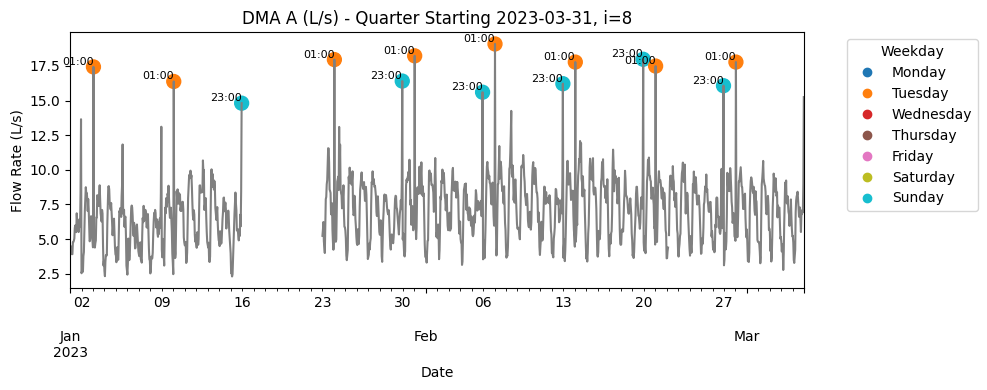

In [12]:

# Group data by quarter
quarters = test_df_a_not_diffed.groupby(pd.Grouper(freq='Q'))

# Create a colormap for the weekdays
cmap = cm.get_cmap('tab10', 7)  # Using 'tab10' colormap for distinct colors

# Plot each quarter separately
for i, (name, group) in enumerate(quarters):
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Plot the main data
    group['DMA A (L/s)'].plot(ax=ax, label='DMA A (L/s)', color='gray')
    
    # Get the outliers
    outliers = group.dropna(subset=['outlier_val'])
    
    # Ensure 'weekday' is integer (0=Monday, 6=Sunday)
    weekdays = outliers['weekday'].astype(int)
    
    # Map weekdays to colors
    colors = [cmap(weekday) for weekday in weekdays]
    
    # Plot the outliers with colors based on 'weekday'
    ax.scatter(outliers.index, outliers['outlier_val'], c=colors, marker='o', s=100, label='Outliers')
    
    # Add labels with the time of the outliers
    for idx, row in outliers.iterrows():
        time_label = idx.strftime('%H:%M')  # Format the time as HH:MM
        ax.text(idx, row['outlier_val'], time_label, fontsize=8, color='black', ha='right', va='bottom')
    
    # Create a legend for weekdays
    handles = []
    labels = []
    for weekday in range(7):
        handles.append(plt.Line2D([], [], marker='o', color=cmap(weekday), linestyle='None'))
        labels.append(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][weekday])
    ax.legend(handles, labels, title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_title(f'DMA A (L/s) - Quarter Starting {name.strftime("%Y-%m-%d")}, i={i}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Flow Rate (L/s)')
    plt.tight_layout()
    plt.show()


In [33]:
# make all column names that are longer than 42 characters shorter BY adding a newline after the middle word
new_column_names = ['A: Hospital district', 'B: Residential district in the countryside', 'C: Residential District in the countryside', 'D: Suburban residential/commercial district', 'E: Residential/commercial district close to the city centre', 'F: Suburban district including sport facilities and office buildings', 'G: Residential district close to the city centre', 'H: City centre district', 'I: Commerical/industrial district close to the port', 'J: Commerical/industrial district close to the port']
# add DMA in front of the column names
new_column_names = ['DMA ' + i for i in new_column_names]
new_column_names_with_newlines = []

for name in new_column_names:
    if len(name) > 30:
        word_list = name.split(' ')
        middle = int(len(word_list) / 1.7)
        word_list.insert(middle, '\n')
        new_name = ' '.join(word_list)
        new_column_names_with_newlines.append(new_name)
    else:
        new_column_names_with_newlines.append(name)
new_column_names_with_newlines

['DMA A: Hospital district',
 'DMA B: Residential district \n in the countryside',
 'DMA C: Residential District \n in the countryside',
 'DMA D: \n Suburban residential/commercial district',
 'DMA E: Residential/commercial district close \n to the city centre',
 'DMA F: Suburban district including \n sport facilities and office buildings',
 'DMA G: Residential district close \n to the city centre',
 'DMA H: City centre district',
 'DMA I: Commerical/industrial district \n close to the port',
 'DMA J: Commerical/industrial district \n close to the port']

In [22]:
# get the y values from the sequences that the models are trained on, to plot later
# here it is easier to reproduce them

# dmas
DMAs = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
DMAs_columns = ['DMA A (L/s)', 'DMA B (L/s)', 'DMA C (L/s)', 'DMA D (L/s)',
       'DMA E (L/s)', 'DMA F (L/s)', 'DMA G (L/s)', 'DMA H (L/s)',
       'DMA I (L/s)', 'DMA J (L/s)']

# make the sequences
train_dfs2s = []
val_dfs2s = []
test_dfs2s = []
for i, dma in enumerate(DMAs):
    print(f'Processing {dma} ({i+1}/{len(DMAs)})')

    dict_config_sequences = {
        'historic_sequence_length':     168,
        'prediction_sequence_length':   24,
        'historic_features':            None,
        'future_features':              None,
        'future_one_hots':              ['Weekday', 'Hour'],
        'historic_one_hots':            ['Weekday', 'Hour'],
        'target_feature':               dma,
        'static_features':              None,
        'include_historic_target':      True,
        'return_indices':               True,
    }

    # make train data sequences
    train_dfs2 = []
    for train_df in train_dfs:
        train_df = train_df[~train_df.index.duplicated(keep='first')][DMAs_columns]
        train_df.columns = DMAs
        _, train_y, train_ind = make_sequences(
            train_df,
            **dict_config_sequences
            )     
        train_dma_slice_y = torch.cat([train_y[:-1,0], train_y[-1,:]]).numpy()
        train_dma_slice_ind = pd.DatetimeIndex([ind[0] for ind in train_ind[:-1]])
        train_dma_slice_ind = train_dma_slice_ind.union(train_ind[-1])
        df = pd.DataFrame(train_dma_slice_y, index=train_dma_slice_ind, columns=[dma])
        new_index = pd.date_range(start=df.index[0], end=df.index[-1], freq='h')
        df = df.reindex(new_index)
        train_dfs2.append(df.copy())
    train_dfs2s.append(train_dfs2)
    
    # make val  data sequences
    val_dfs2 = []
    for val_df in val_dfs:
        val_df = val_df[~val_df.index.duplicated(keep='first')][DMAs_columns]
        val_df.columns = DMAs
        _, val_y, val_ind = make_sequences(
            val_df,
            **dict_config_sequences
            )
        try:
            val_dma_slice_y = torch.cat([val_y[:-1,0], val_y[-1,:]]).numpy()
        except:
            print(val_y.shape)
        if len(val_y) > 0:
            val_dma_slice_ind = pd.DatetimeIndex([ind[0] for ind in val_ind[:-1]])
            val_dma_slice_ind = val_dma_slice_ind.union(val_ind[-1])
            df = pd.DataFrame(val_dma_slice_y, index=val_dma_slice_ind, columns=[dma])
            new_index = pd.date_range(start=df.index[0], end=df.index[-1], freq='h')
            df = df.reindex(new_index)
            val_dfs2.append(df.copy())
    val_dfs2s.append(val_dfs2)
    test_df.columns = DMAs
    _, test_y, test_ind = make_sequences(
        test_df,
        **dict_config_sequences
        )
    test_df = test_df[~test_df.index.duplicated(keep='first')][DMAs]
    
    # make the test data sequences
    test_dma_slice_y = torch.cat([test_y[:-1,0], test_y[-1,:]]).numpy()
    test_dma_slice_ind = pd.DatetimeIndex([ind[0] for ind in test_ind[:-1]])
    test_dma_slice_ind = test_dma_slice_ind.union(test_ind[-1])
    df = pd.DataFrame(test_dma_slice_y, index=test_dma_slice_ind, columns=[dma])
    df = df[~df.index.duplicated(keep='first')]
    new_index = pd.date_range(start=df.index[0], end=df.index[-1], freq='h')
    df = df.reindex(new_index)
    test_df2 = df.copy()
    test_dfs2s.append(test_df2)

Processing A (1/10)
Processing B (2/10)
Processing C (3/10)
Processing D (4/10)
Processing E (5/10)
Processing F (6/10)
Processing G (7/10)
torch.Size([0])
Processing H (8/10)
Processing I (9/10)
Processing J (10/10)


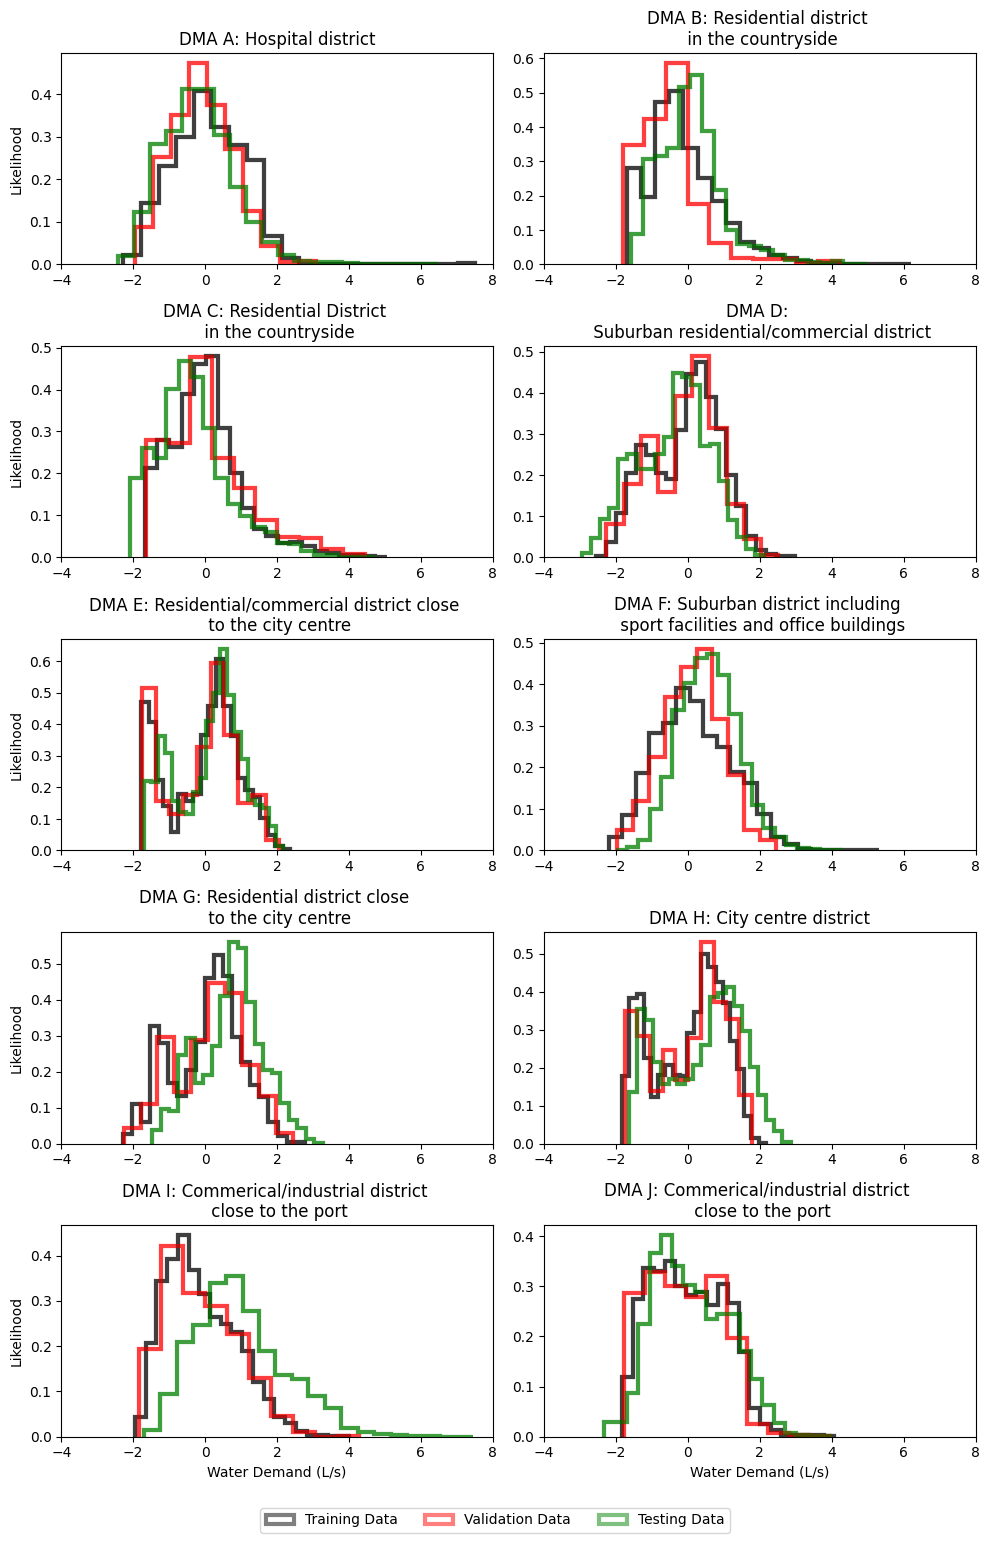

In [ ]:
fig, axs = plt.subplots(5,2, figsize=(10, 15))
axs = axs.flatten()
colors =['#ececec',
         '#ffd3d3',
         '#d9ecd9']

low=-4
high=8

for i, dma in enumerate(DMAs):
    ax = axs[i]

    # plot distribution of train/val/test sets, don't fill the bars
    ax.hist(pd.concat(train_dfs2s[i])[dma], bins=20, color='black', alpha=0.5, label='Training Data', density=True, histtype='step', linewidth=3)
    ax.hist(pd.concat(val_dfs2s[i])[dma], bins=10, color='red', alpha=0.5, label='Validation Data', density=True, histtype='step', linewidth=3)
    ax.hist(test_dfs2s[i], bins=20, color='green', alpha=0.5, label='Testing Data', density=True, histtype='step', linewidth=3)

    # get the likelihoods
    train_likelihoods = ax.hist(pd.concat(train_dfs2s[i])[dma], bins=20, color='black', alpha=0.5, label='Training Data', density=True, histtype='step', linewidth=3)[0]
    val_likelihoods = ax.hist(pd.concat(val_dfs2s[i])[dma], bins=10, color='red', alpha=0.5, label='Validation Data', density=True, histtype='step', linewidth=3)[0]
    test_likelihoods = ax.hist(test_dfs2s[i], bins=20, color='green', alpha=0.5, label='Testing Data', density=True, histtype='step', linewidth=3)[0]

    # set the x-axis limits
    ax.set_xlim(low, high)
    ax.set_title(new_column_names_with_newlines[i])

    if i % 2 == 0:
        ax.set_ylabel('Likelihood')

    if i >= 8:
        ax.set_xlabel('Water Demand (L/s)')

    # # return the likelihoods
    # train_likelihoods, val_likelihoods, test_likelihoods  
    
    ax.set_xlim(low, high)
    ax.set_title(new_column_names_with_newlines[i])

    if i%2 == 0:
        ax.set_ylabel('Likelihood')
    
    if i >= 8:
        ax.set_xlabel('Water Demand (L/s)')


# add legend to the bottom of the entire fig
plt.tight_layout()
fig.legend(['Training Data', 'Validation Data', 'Testing Data'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.03))



In [23]:


# Create a directory to save the images if it doesn't exist
output_dir = r"../figures/dma_plot_data"
os.makedirs(output_dir, exist_ok=True)

new_column_names = ['A: Hospital district', 'B: Residential district in the countryside', 'C: Residential District in the countryside', 
                    'D: Suburban residential/commercial district', 'E: Residential/commercial district close to the city centre', 
                    'F: Suburban district including sport facilities and office buildings', 'G: Residential district close to the city centre', 
                    'H: City centre district', 'I: Commercial/industrial district close to the port', 
                    'J: Commercial/industrial district close to the port']

monitor_width = 1920 / 1.5
monitor_height = 1080 / 1.5

# Loop over each DMA column and create a plot for each, saving them as images
for i, test_df__ in enumerate(test_dfs2s):
    fig = go.Figure()
    dma = DMAs[i]

    # # Add a line for this specific DMA
    # fig.add_trace(go.Scatter(x=test_df.index, y=test_df[dma], mode='lines', name=f'Testing Data', line=dict(color='green'), opacity=0.5))
    # Add a line for this specific DMA with showlegend=True to make the legend visible
    fig.add_trace(go.Scatter(
        x=test_df__.index, 
        y=test_df__[dma], 
        mode='lines', 
        name=f'Testing Data', 
        line=dict(color='green'), 
        opacity=0.5,
        showlegend=True  # Ensure legend is visible
    ))
    # Update layout with black elements and labels, and add the legend below the plot
    fig.update_layout(
        title=f'Water Demand DMA {new_column_names[i]}',
        xaxis_title='Date [h]',
        yaxis_title='Water Demand [L/s]',
        xaxis=dict(color='black'),
        yaxis=dict(color='black'),
        font=dict(color='black'),
        plot_bgcolor='white',
        legend_title=dict(text='Legend', font=dict(color='black')),
        legend=dict(
            yanchor="top",
            y=-0.1,  # Adjust this value to control how far below the plot the legend appears
            xanchor="center",
            x=0.5,
            orientation="h"  # Make the legend horizontal
        )
    )

    # Define the filename for the image
    filename = os.path.join(output_dir, f'DMA_{dma}_test_Water_Demand.png')

    # Save the figure as a PNG file
    pio.write_image(fig, filename, width=monitor_width, height=monitor_height)

    print(f"Plot for {dma} saved as {filename}")


Plot for A saved as ../figures/dma_plot_data/DMA_A_test_Water_Demand.png
Plot for B saved as ../figures/dma_plot_data/DMA_B_test_Water_Demand.png
Plot for C saved as ../figures/dma_plot_data/DMA_C_test_Water_Demand.png
Plot for D saved as ../figures/dma_plot_data/DMA_D_test_Water_Demand.png
Plot for E saved as ../figures/dma_plot_data/DMA_E_test_Water_Demand.png
Plot for F saved as ../figures/dma_plot_data/DMA_F_test_Water_Demand.png
Plot for G saved as ../figures/dma_plot_data/DMA_G_test_Water_Demand.png
Plot for H saved as ../figures/dma_plot_data/DMA_H_test_Water_Demand.png
Plot for I saved as ../figures/dma_plot_data/DMA_I_test_Water_Demand.png
Plot for J saved as ../figures/dma_plot_data/DMA_J_test_Water_Demand.png


In [24]:
import plotly.graph_objects as go
import plotly.io as pio
import os


# Create a directory to save the images if it doesn't exist
output_dir = r"../figures/dma_plot_data"
os.makedirs(output_dir, exist_ok=True)

new_column_names = ['A: Hospital district', 'B: Residential district in the countryside', 'C: Residential District in the countryside', 'D: Suburban residential/commercial district', 'E: Residential/commercial district close to the city centre', 'F: Suburban district including sport facilities and office buildings', 'G: Residential district close to the city centre', 'H: City centre district', 'I: Commercial/industrial district close to the port', 'J: Commercial/industrial district close to the port']

monitor_width = 1920 / 1.5
monitor_height = 1080 / 1.5

# Loop over each DMA column and create a plot for each, saving them as images
for i, dma in enumerate(DMAs):
    fig = go.Figure()

    # Flag to ensure only the first slice has a legend entry for training and validation
    first_train_slice = True
    first_val_slice = True

    # Plot each training slice separately for this specific DMA
    for train_slice in train_dfs2s[i]:
        fig.add_trace(go.Scatter(
            x=train_slice.index, 
            y=train_slice[dma], 
            mode='lines', 
            name=f'Training Data <br> DMA {new_column_names[i]}' if first_train_slice else None,  # Show legend for first slice only
            line=dict(color='red'),
            opacity=0.5,
            showlegend=first_train_slice  # Show legend only for the first slice
        ))
        first_train_slice = False  # Disable legend for subsequent slices

    # Plot each validation slice separately for this specific DMA
    for val_slice in val_dfs2s[i]:
        fig.add_trace(go.Scatter(
            x=val_slice.index, 
            y=val_slice[dma], 
            mode='lines', 
            name=f'Validation Data <br> DMA {new_column_names[i]}' if first_val_slice else None,  # Show legend for first slice only
            line=dict(color='black'),
            opacity=0.5,
            showlegend=first_val_slice  # Show legend only for the first slice
        ))
        first_val_slice = False  # Disable legend for subsequent slices

    # Update layout with black elements and labels
    fig.update_layout(
        title=f'Water Demand DMA {new_column_names[i]}',
        xaxis_title='Date [h]',
        yaxis_title='Water Demand [L/s]',
        xaxis=dict(color='black'),
        yaxis=dict(color='black'),
        font=dict(color='black'),
        plot_bgcolor='white',
           legend=dict(
        yanchor="top",
        y=-0.1,  # Adjust this value to control how far below the plot the legend appears
        xanchor="center",
        x=0.5,
        orientation="h"  # Make the legend horizontal
    )
    )

    # Define the filename for the image
    filename = os.path.join(output_dir, f'DMA_{dma}_train_val_Water_Demand.png')

    # Save the figure as a PNG file
    pio.write_image(fig, filename, width=monitor_width, height=monitor_height)

    print(f"train val Plot for {dma} saved as {filename}")


train val Plot for A saved as ../figures/dma_plot_data/DMA_A_train_val_Water_Demand.png
train val Plot for B saved as ../figures/dma_plot_data/DMA_B_train_val_Water_Demand.png
train val Plot for C saved as ../figures/dma_plot_data/DMA_C_train_val_Water_Demand.png
train val Plot for D saved as ../figures/dma_plot_data/DMA_D_train_val_Water_Demand.png
train val Plot for E saved as ../figures/dma_plot_data/DMA_E_train_val_Water_Demand.png
train val Plot for F saved as ../figures/dma_plot_data/DMA_F_train_val_Water_Demand.png
train val Plot for G saved as ../figures/dma_plot_data/DMA_G_train_val_Water_Demand.png
train val Plot for H saved as ../figures/dma_plot_data/DMA_H_train_val_Water_Demand.png
train val Plot for I saved as ../figures/dma_plot_data/DMA_I_train_val_Water_Demand.png
train val Plot for J saved as ../figures/dma_plot_data/DMA_J_train_val_Water_Demand.png


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
import os
# train_df = pd.concat(train_dfs)[test_df.columns[:-1]] #train df consists of 5 dfs
# val_df = pd.concat(val_dfs)[test_df.columns[:-1]] # val dfs consits of 4 dfs
# Create a directory to save the images if it doesn't exist


output_dir = "dma_plots"
os.makedirs(output_dir, exist_ok=True)
new_column_names = ['A: Hospital district', 'B: Residential district in the countryside', 'C: Residential District in the countryside', 'D: Suburban residential/commercial district', 'E: Residential/commercial district close to the city centre', 'F: Suburban district including sport facilities and office buildings', 'G: Residential district close to the city centre', 'H: City centre district', 'I: Commerical/industrial district close to the port', 'J: Commerical/industrial district close to the port']
val_df.columns = test_df.columns
# reindex val_df with first to end of val_df
# new_index_val_df = pd.date_range(start=val_df.index[0], periods=len(val_df), freq='H')
# val_df.reindex(new_index_val_df)
train_df.columns = test_df.columns
# reindex train_df with first to end of train_df
# new_index_train_df = pd.date_range(start=train_df.index[0], periods=len(train_df), freq='H')
# train_df.reindex(new_index_train_df)

monitor_width = 1920/1.5
monitor_height = 1080/1.5

# Loop over each DMA column and create a plot for each, saving them as images
for i, dma in enumerate(test_df.columns):
    fig = go.Figure()

    # Add a line for this specific DMA
    # fig.add_trace(go.Scatter(x=val_df.index, y=val_df[dma], mode='lines', name=f'Validation Data', line=dict(color='black'), opacity=0.5))
    # fig.add_trace(go.Scatter(x=train_df.index, y=train_df[dma], mode='lines', name=f'Training Data', line=dict(color='red'), opacity=0.5))
      # Plot each training slice separately for this specific DMA
    for train_slice in train_dfs:
        fig.add_trace(go.Scatter(
            x=train_slice.index, 
            y=train_slice[dma], 
            mode='lines', 
            name=f'Training Data (DMA {new_column_names[i]})',
            line=dict(color='red'),
            opacity=0.5
        ))

    # Plot each validation slice separately for this specific DMA
    for val_slice in val_dfs:
        fig.add_trace(go.Scatter(
            x=val_slice.index, 
            y=val_slice[dma], 
            mode='lines', 
            name=f'Validation Data (DMA {new_column_names[i]})',
            line=dict(color='black'),
            opacity=0.5
        ))


    # Update layout with black elements and labels
    fig.update_layout(
        title=f'Water Demand DMA {new_column_names[i]}',
        xaxis_title='Date [h]',
        yaxis_title='Water Demand [L/s]',
        # legend_title=f'DMA {dma}',
        xaxis=dict(color='black'),
        yaxis=dict(color='black'),
        font=dict(color='black'),
        plot_bgcolor='white',
    )

    # Define the filename for the image
    filename = os.path.join(output_dir, f'DMA_{dma}_train_val_Water_Demand.png')

    # Save the figure as a PNG file
    pio.write_image(fig, filename, width=monitor_width, height=monitor_height)

    print(f"train val Plot for {dma} saved as {filename}")



train val Plot for A saved as dma_plots/DMA_A_train_val_Water_Demand.png
train val Plot for B saved as dma_plots/DMA_B_train_val_Water_Demand.png
train val Plot for C saved as dma_plots/DMA_C_train_val_Water_Demand.png
train val Plot for D saved as dma_plots/DMA_D_train_val_Water_Demand.png
train val Plot for E saved as dma_plots/DMA_E_train_val_Water_Demand.png
train val Plot for F saved as dma_plots/DMA_F_train_val_Water_Demand.png
train val Plot for G saved as dma_plots/DMA_G_train_val_Water_Demand.png
train val Plot for H saved as dma_plots/DMA_H_train_val_Water_Demand.png
train val Plot for I saved as dma_plots/DMA_I_train_val_Water_Demand.png
train val Plot for J saved as dma_plots/DMA_J_train_val_Water_Demand.png


In [25]:
new_column_names = ['A: Hospital district', 'B: Residential district in the countryside', 'C: Residential District in the countryside', 'D: Suburban residential/commercial district', 'E: Residential/commercial district close to the city centre', 'F: Suburban district including sport facilities and office buildings', 'G: Residential district close to the city centre', 'H: City centre district', 'I: Commerical/industrial district close to the port', 'J: Commerical/industrial district close to the port']
df_inflow = pd.read_excel(r'../data/raw/WDSA/Inflow_Data_4.xlsx', index_col=0, parse_dates=True, date_format='%d/%m/%Y %H:%M')

# add DMA in front of the column names
new_column_names = ['DMA ' + i for i in new_column_names]
df_inflow.columns = new_column_names



/tmp/ipykernel_83054/3996310783.py:7: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




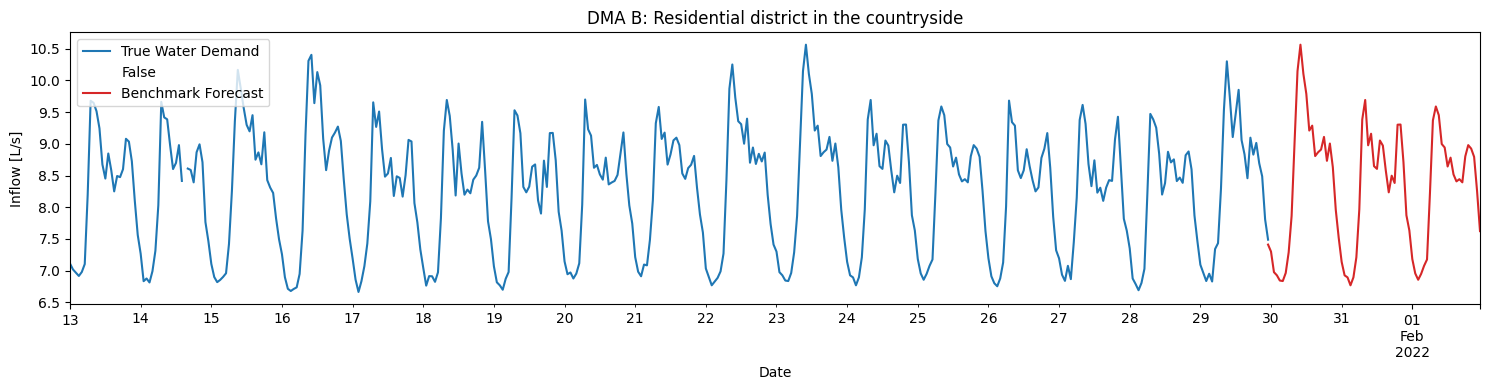

In [26]:
# graph for presentation
df_inflow[new_column_names[1]]['2022-01-13':'2022-01-29'].plot(figsize=(15, 4), label='True Water Demand')
df_inflow[new_column_names[1]]['2022-01-30':'2022-02-01'].plot(figsize=(15, 4), color='white', legend=False, label=False)

# make a new df where DMA B from ['2022-01-30':'2022-02-01'] has the values of a week before
df_inflow_copy = df_inflow.copy()
df_inflow_copy[new_column_names[1]]['2022-01-29 23:00:00':'2022-02-01'] = df_inflow[new_column_names[1]]['2022-01-22 23:00:00':'2022-01-25']

df_inflow_copy[new_column_names[1]]['2022-01-29 23:00:00':'2022-02-01'].plot(figsize=(15, 4), label='Benchmark Forecast', color='tab:red')
plt.legend(loc='upper left')

# df_inflow[new_column_names[1]]['2022-01-30':'2022-02-01'].plot(figsize=(15, 4), color='white', legend=False, label=False)


plt.ylabel('Inflow [L/s]')
plt.xlabel('Date')
# move xlabel up
# plt.
# rotate xticks to 0 degrees
plt.xticks(rotation=0)
# plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.title(new_column_names[1])
plt.tight_layout()


/tmp/ipykernel_83054/1907561504.py:6: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




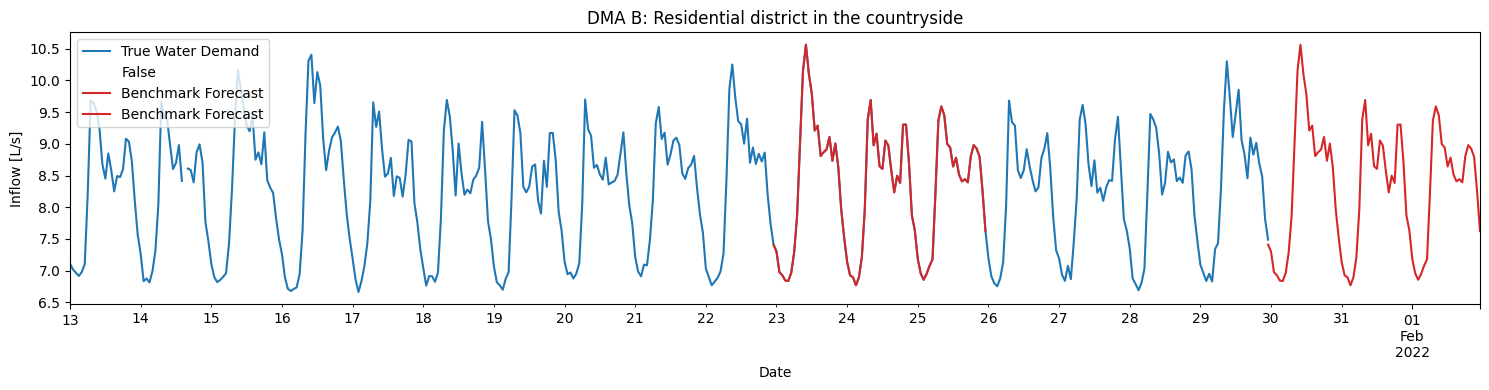

In [27]:
df_inflow[new_column_names[1]]['2022-01-13':'2022-01-29'].plot(figsize=(15, 4), label='True Water Demand')
df_inflow[new_column_names[1]]['2022-01-30':'2022-02-01'].plot(figsize=(15, 4), color='white', legend=False, label=False)

# make a new df where DMA B from ['2022-01-30':'2022-02-01'] has the values of a week before
df_inflow_copy = df_inflow.copy()
df_inflow_copy[new_column_names[1]]['2022-01-29 23:00:00':'2022-02-01'] = df_inflow[new_column_names[1]]['2022-01-22 23:00:00':'2022-01-25']
df_inflow[new_column_names[1]]['2022-01-22 23:00:00':'2022-01-25'].plot(figsize=(15, 4), label='Benchmark Forecast', color='tab:red')

df_inflow_copy[new_column_names[1]]['2022-01-29 23:00:00':'2022-02-01'].plot(figsize=(15, 4), label='Benchmark Forecast', color='tab:red')
plt.legend(loc='upper left')

# df_inflow[new_column_names[1]]['2022-01-30':'2022-02-01'].plot(figsize=(15, 4), color='white', legend=False, label=False)


plt.ylabel('Inflow [L/s]')
plt.xlabel('Date')
# move xlabel up
# plt.
# rotate xticks to 0 degrees
plt.xticks(rotation=0)
# plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.title(new_column_names[1])
plt.tight_layout()

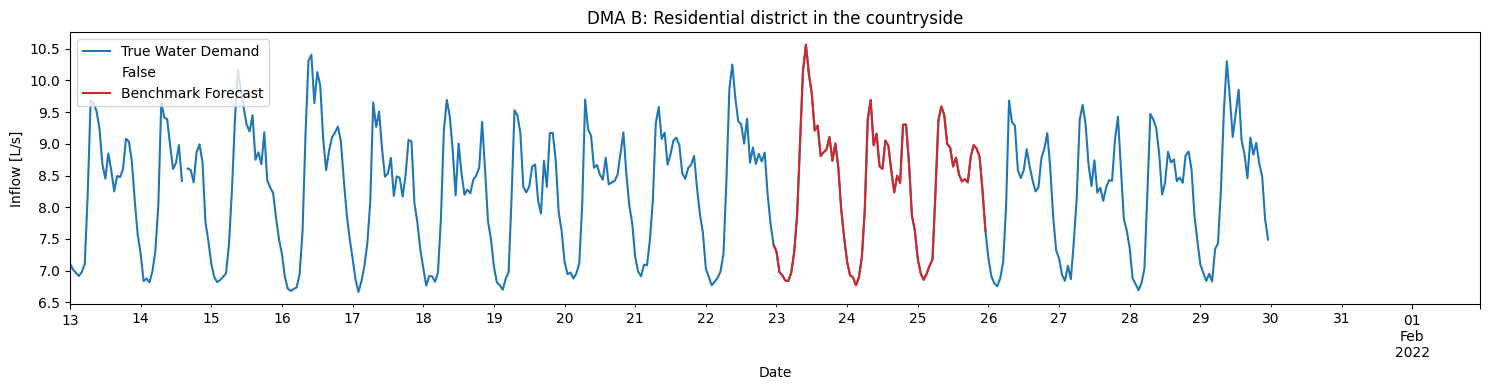

In [28]:
df_inflow[new_column_names[1]]['2022-01-13':'2022-01-29'].plot(figsize=(15, 4), label='True Water Demand')
df_inflow[new_column_names[1]]['2022-01-30':'2022-02-01'].plot(figsize=(15, 4), color='white', legend=False, label=False)

# make a new df where DMA B from ['2022-01-30':'2022-02-01'] has the values of a week before
df_inflow_copy = df_inflow.copy()
# df_inflow_copy[new_column_names[1]]['2022-01-29 23:00:00':'2022-02-01'] = df_inflow[new_column_names[1]]['2022-01-22 23:00:00':'2022-01-25']
df_inflow[new_column_names[1]]['2022-01-22 23:00:00':'2022-01-25'].plot(figsize=(15, 4), label='Benchmark Forecast', color='tab:red')
plt.legend(loc='upper left')
df_inflow[new_column_names[1]]['2022-01-30':'2022-02-01'].plot(figsize=(15, 4), color='white', legend=False, label=False)

# df_inflow[new_column_names[1]]['2022-01-30':'2022-02-01'].plot(figsize=(15, 4), color='white', legend=False, label=False)


plt.ylabel('Inflow [L/s]')
plt.xlabel('Date')
# move xlabel up
# plt.
# rotate xticks to 0 degrees
plt.xticks(rotation=0)
# plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.title(new_column_names[1])
plt.tight_layout()


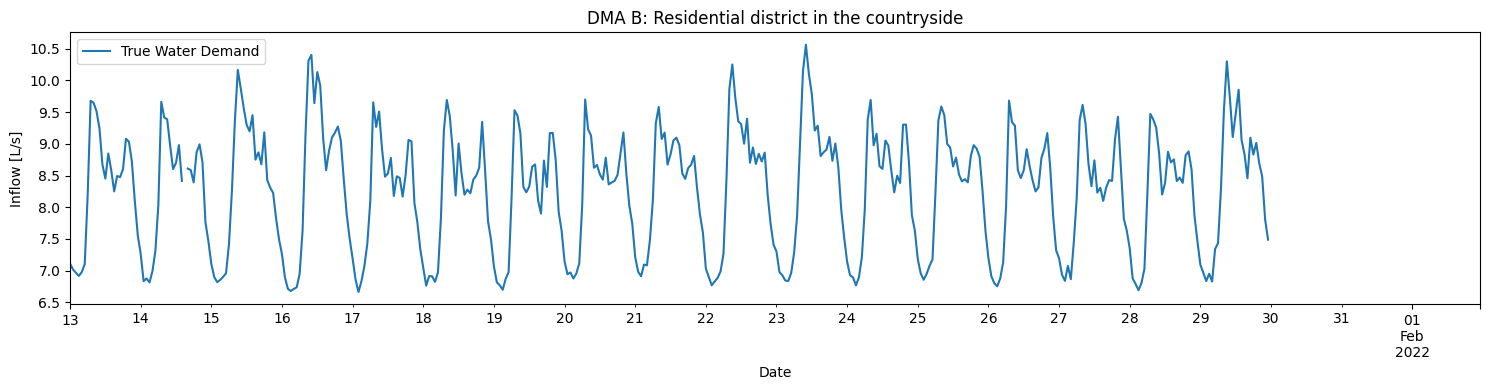

In [29]:
df_inflow[new_column_names[1]]['2022-01-13':'2022-01-29'].plot(figsize=(15, 4), label='True Water Demand')

# make a new df where DMA B from ['2022-01-30':'2022-02-01'] has the values of a week before
df_inflow_copy = df_inflow.copy()
# df_inflow_copy[new_column_names[1]]['2022-01-29 23:00:00':'2022-02-01'] = df_inflow[new_column_names[1]]['2022-01-29 23:00:00':'2022-02-01']
# df_inflow_copy[new_column_names[1]]['2022-01-29 23:00:00':'2022-02-01'].plot(figsize=(15, 4), label='Benchmark Forecast')
plt.legend(loc='upper left')

df_inflow[new_column_names[1]]['2022-01-30':'2022-02-01'].plot(figsize=(15, 4), color='white', legend=False, label=False)


plt.ylabel('Inflow [L/s]')
plt.xlabel('Date')
# move xlabel up
# plt.
# rotate xticks to 0 degrees
plt.xticks(rotation=0)
# plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.title(new_column_names[1])
plt.tight_layout()


In [30]:
df = df_inflow.copy()
# take first year and two months
df = df['2021-01-01':'2022-03-05']
df.columns = new_column_names_with_newlines

# compute autocorrelations:
def compute_autocorrelations(df, key, lags):
    df_key = df[[key]].copy()
    frames = [df_key[key]]
    for i in range(1, lags+1):
        keyshift = df_key[key].shift(i).copy()
        keyshift.rename('lag_' + str(i), inplace=True)
        frames.append(keyshift)
    # print(frames)
    df_key = pd.concat(frames, axis=1)
    df_key.dropna(inplace=True)

    # compute correlation of firt column with each of the lagged columns
    correlations = []
    for i in range(1, lags+1):
        correlations.append(df_key[key].corr(df_key[f'lag_{i}']))
    return correlations


NameError: name 'new_column_names_with_newlines' is not defined

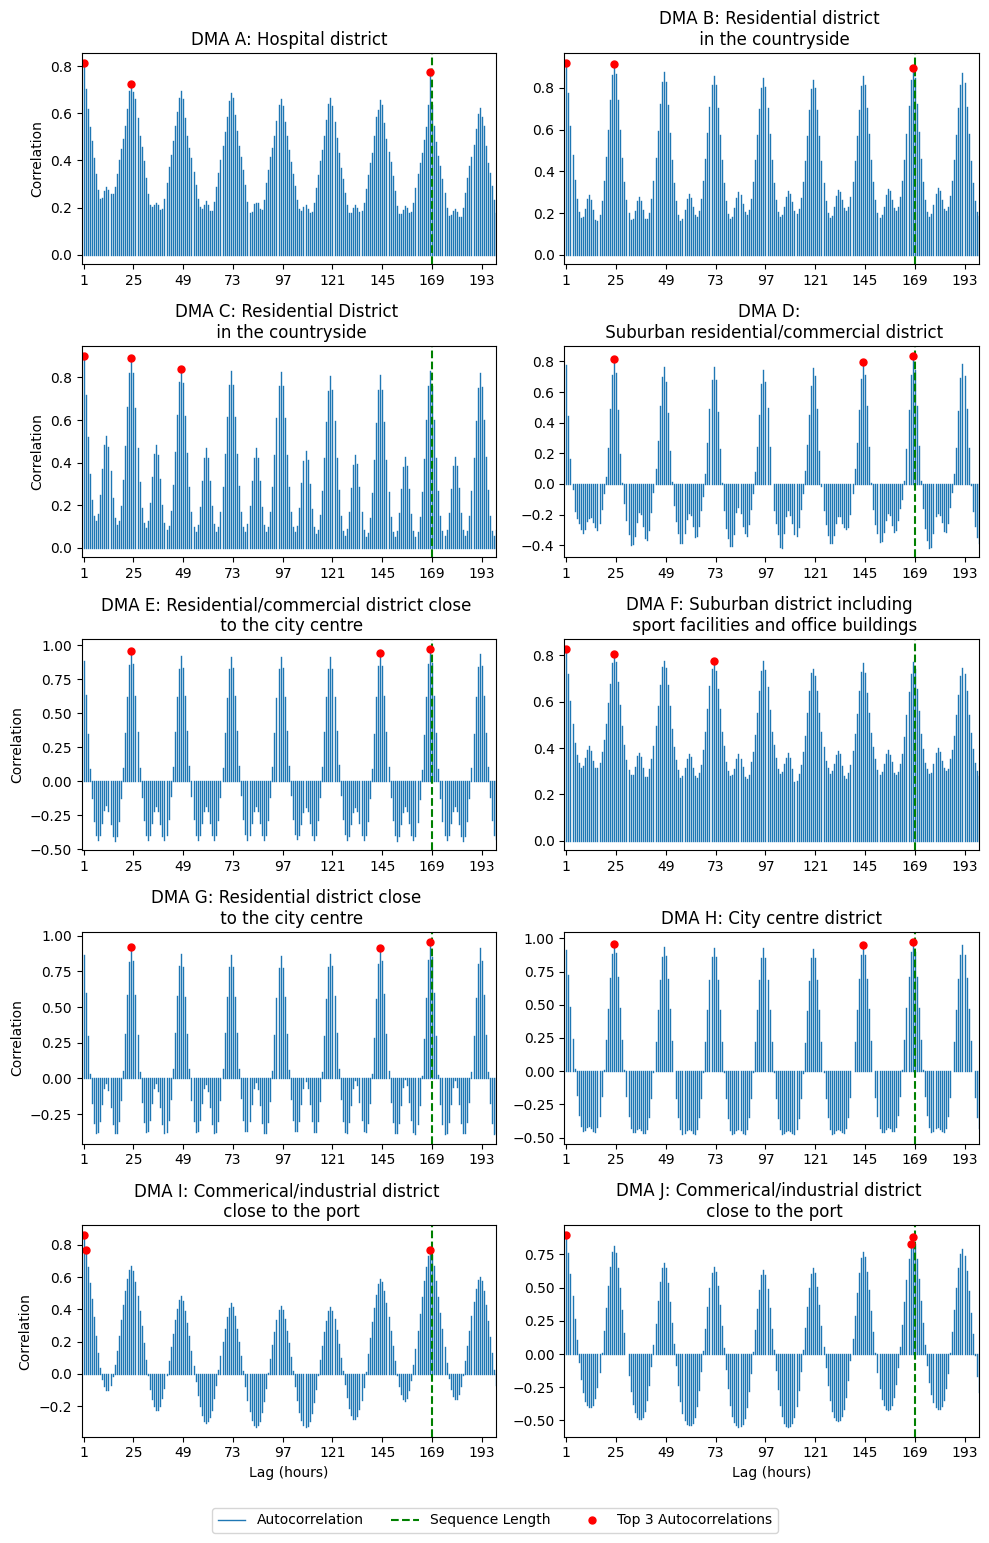

In [ ]:
# make subplots 2x5
def make_vector_bars(x, y):
    new_x = []
    new_y = []
    for x_val, y_val in zip(x, y):
        new_y.append(0)
        new_y.append(y_val)
        new_y.append(np.nan)
        new_x.append(x_val)
        new_x.append(x_val)
        new_x.append(x_val)
    return new_x, new_y


def plot_acf(df):
    fig, axs = plt.subplots(5, 2, figsize=(10, 15))
    axs = axs.ravel()
    for i, dma in enumerate(df.columns):
        # autocorrelation
        lags = 200
        autocorrelations = compute_autocorrelations(df, dma, lags)
        x_lags = np.arange(1, lags+1)
        axs[i].plot(
            *make_vector_bars(x_lags, autocorrelations),   
            linewidth=1,
            label='Autocorrelation'     
        )
        axs[i].axvline(x=169, color='g', linestyle='--', label='Sequence Length')
        # plot a marker at the top 3 highest autocorrelations
        for j in range(3):
            max_index = np.argmax(autocorrelations)
            axs[i].plot(x_lags[max_index], autocorrelations[max_index], 'ro', markersize=5, label='Top 3 Autocorrelations')
            autocorrelations[max_index] = 0

        axs[i].set_title(dma)


        # make the xticks every 24
        axs[i].set_xticks(np.arange(1, 24*9, 24))
        axs[i].set_xlim(0,200)

        if i % 2 == 0:
            axs[i].set_ylabel('Correlation')
        if i >= 8:
            axs[i].set_xlabel('Lag (hours)')
    plt.tight_layout()

    # add One legend with autocorrelations, top 3 autocorrelations and the sequence length
    fig.legend(['Autocorrelation', 'Sequence Length', 'Top 3 Autocorrelations'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.03))

plot_acf(df)



/tmp/ipykernel_97825/2481470192.py:9: UserWarning:

When passing multiple axes, layout keyword is ignored.



Text(0.5, 0.98, 'Daily inflow for each DMA with training, validation and testing splits')

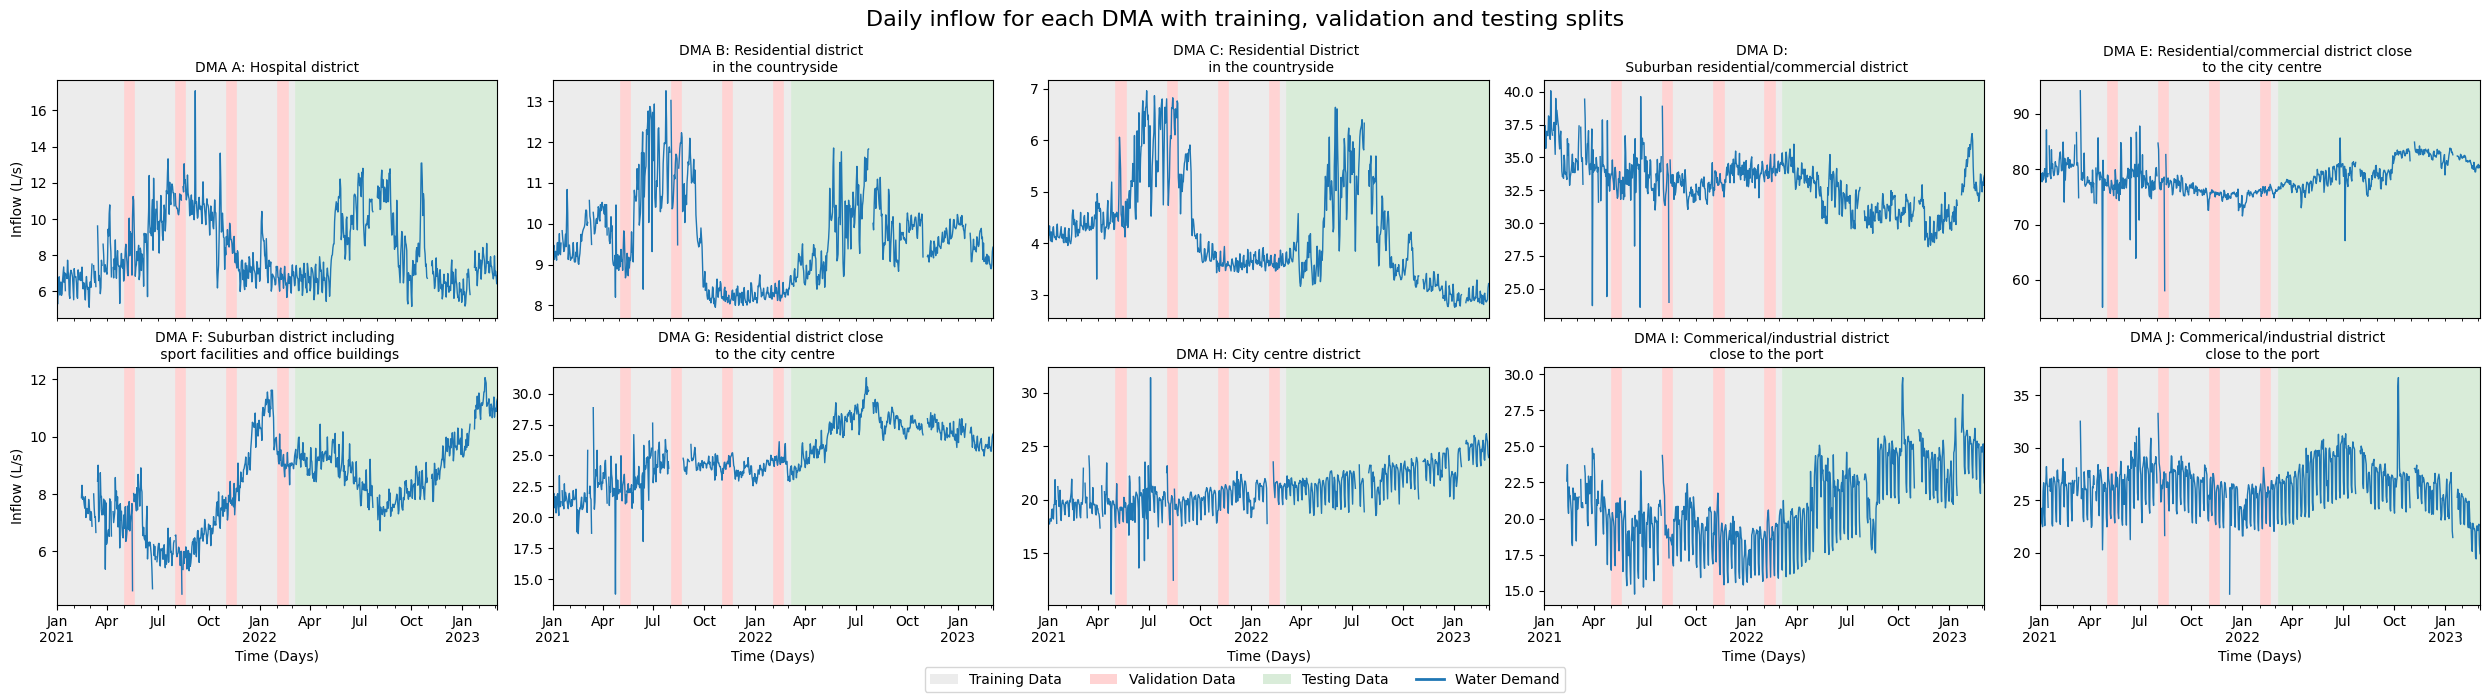

In [ ]:
# resample df_inflow to dmean daily, dma a to j
df_inflow.columns = new_column_names
df_inflow_daily = df_inflow.resample('D').mean()[new_column_names] #fillna(method='ffill')  
df_inflow_daily.columns = new_column_names_with_newlines
minn = df_inflow_daily.min().min()*0.8
maxx = df_inflow_daily.max().max()*1.2
#plot daily inflow with subplots
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25, 7))
df_inflow_daily.plot(subplots=True, layout=(2, 5), ax=ax, color='tab:blue', legend=False, linewidth=1)
# # plot in each subplot the Q1-1.5*IQR and Q3+1.5*IQR of the daily inflow
# Q1_daily = df_inflow_daily.quantile(0.25)
# Q3_daily = df_inflow_daily.quantile(0.75)
# IQR_daily = Q3_daily - Q1_daily

# validation data
split_len_days = 21

val_split_1_start = pd.Timestamp('2021-05-01')
val_split_1_end = val_split_1_start + pd.Timedelta(days=split_len_days)
val_split_2_start = pd.Timestamp('2021-08-01')
val_split_2_end = val_split_2_start + pd.Timedelta(days=split_len_days)
val_split_3_start = pd.Timestamp('2021-11-01')
val_split_3_end = val_split_3_start + pd.Timedelta(days=split_len_days)
val_split_4_start = pd.Timestamp('2022-02-01')
val_split_4_end = val_split_4_start + pd.Timedelta(days=split_len_days)
one_hour = pd.Timedelta(hours=1)
alphas = 1# 0.15

# testing data start
test_split_start = pd.Timestamp('2022-03-05')


c=0
for i in range(2):
    for j in range(5):

        if i ==1:
            ax[i, j].set_xlabel('Time (Days)')
        else:
            ax[i, j].set_xlabel('')
            # remove xticks
            ax[i, j].set_xticks([])

        if j == 0:
            ax[i, j].set_ylabel('Inflow (L/s)')
        else:
            ax[i, j].set_ylabel('')

        # turn off legend
        # ax[i, j].get_legend().remove()

        ax[i, j].set_title('{}'.format(new_column_names_with_newlines[c]), size=10)
        # ax[i, j].set_ylim(minn, maxx)
        #all legends bottom right
        # ax[i, j].legend(loc='lower right')

        # add vertical areas for validation periods
        ax[i, j].axvspan(val_split_1_start, val_split_1_end, color='#ffd3d3', alpha=alphas)
        ax[i, j].axvspan(val_split_2_start, val_split_2_end, color='#ffd3d3', alpha=alphas)
        ax[i, j].axvspan(val_split_3_start, val_split_3_end, color='#ffd3d3', alpha=alphas)
        ax[i, j].axvspan(val_split_4_start, val_split_4_end, color='#ffd3d3', alpha=alphas)

        # add vertical area for testing period
        ax[i, j].axvspan(test_split_start, df_inflow_daily.index[-1], color='#d9ecd9', alpha=alphas)

        # make uncolo#ffd3d3 area for training data
        ax[i, j].axvspan(df_inflow_daily.index[0], val_split_1_start-one_hour, color='#ececec', alpha=alphas)
        ax[i, j].axvspan(val_split_1_end+one_hour, val_split_2_start-one_hour, color='#ececec', alpha=alphas)
        ax[i, j].axvspan(val_split_2_end+one_hour, val_split_3_start-one_hour, color='#ececec', alpha=alphas)
        ax[i, j].axvspan(val_split_3_end+one_hour, val_split_4_start-one_hour, color='#ececec', alpha=alphas)
        ax[i, j].axvspan(val_split_4_end+one_hour, test_split_start-one_hour, color='#ececec', alpha=alphas)


        c+=1

# add custom legend object on the bottom of the entire figure
# with the colors of the validation and testing and training periods
# as well as with one blue line for the water demand of the dma
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [Patch(facecolor='#ececec', alpha=alphas, label='Training Data'),
                   Patch(facecolor='#ffd3d3', alpha=alphas, label='Validation Data'),
                   Patch(facecolor='#d9ecd9', alpha=alphas, label='Testing Data'),
                   Line2D([0], [0], color='tab:blue', lw=2, label='Water Demand')]

# make extra space on the bottom for the legend

fig.legend(handles=legend_elements, loc='lower center', ncol=4)
# fig.legend(handles=legend_elements, loc='lower center', ncol=3)

fig.tight_layout()
fig.subplots_adjust(bottom=0.13);
# 'Daily inflow for each DMA with training, validation and testing splits'
# set title of entire figure
# adjust to put it above the subplots
fig.subplots_adjust(top=0.88)
fig.suptitle('Daily inflow for each DMA with training, validation and testing splits', size=16)
# fig.savefig('data_splits.svg')

/tmp/ipykernel_97825/1754112504.py:4: UserWarning:

When passing multiple axes, layout keyword is ignored.



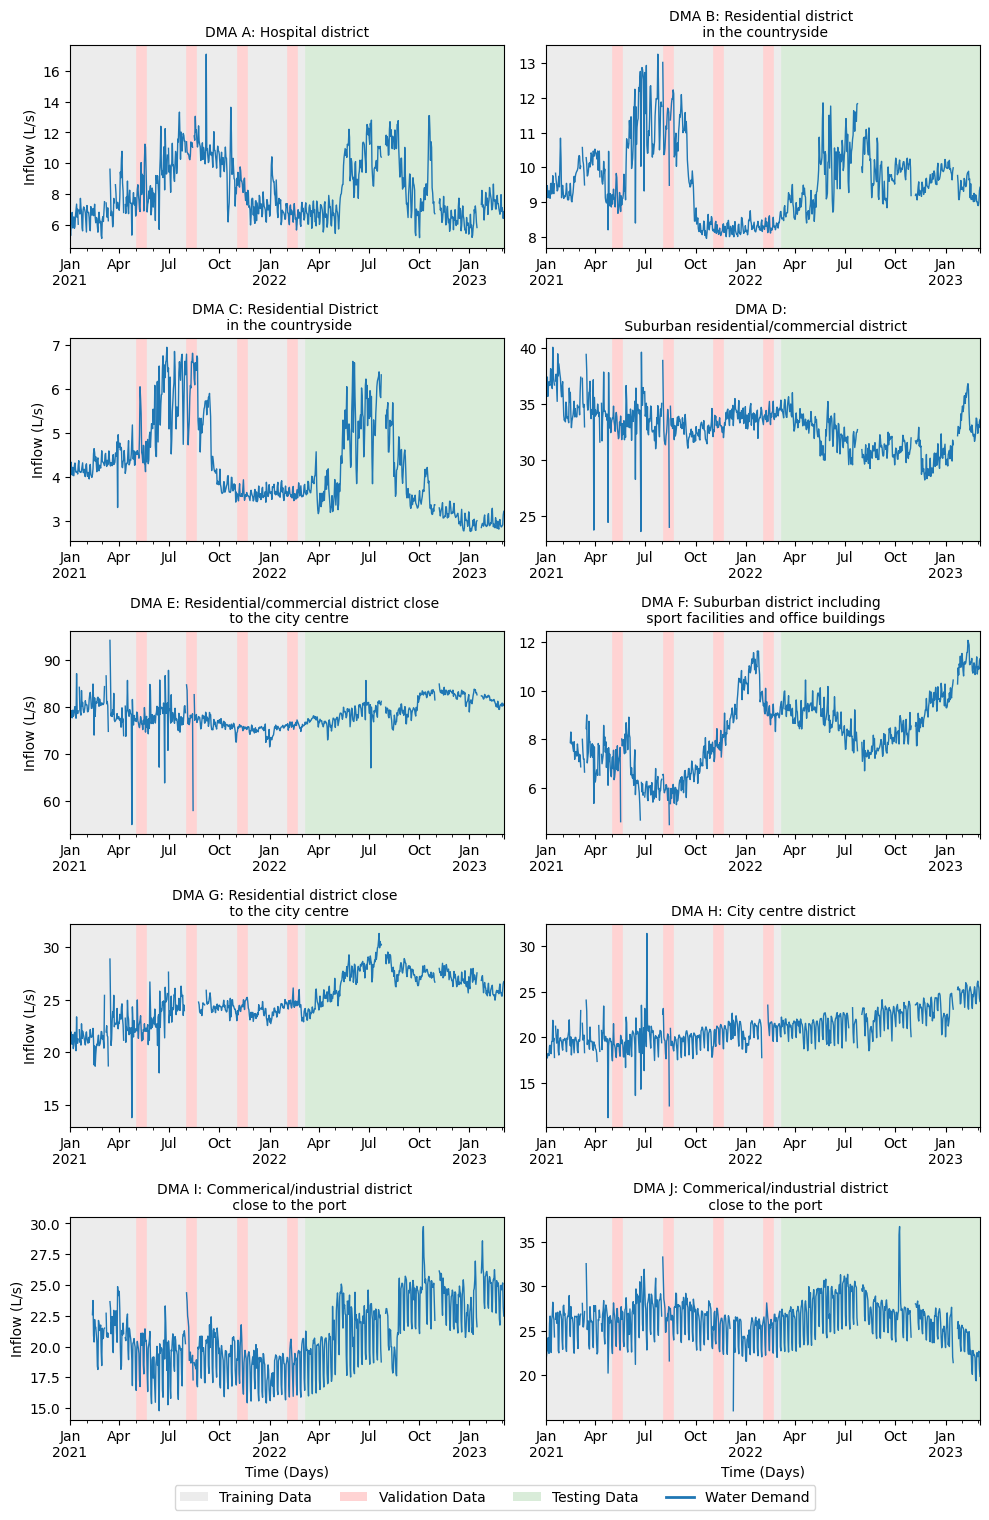

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))
df_inflow_daily = df_inflow.resample('D').mean() #fillna(method='ffill')  
df_inflow_daily.columns = new_column_names_with_newlines
df_inflow_daily.plot(subplots=True, layout=(5, 2), ax=ax, color='tab:blue', legend=False, linewidth=1)

c = 0
for i in range(5):
    for j in range(2):
        if i == 4:
            ax[i, j].set_xlabel('Time (Days)')
        else:
            ax[i, j].set_xlabel('')
            # ax[i, j].set_xticks([])

        if j == 0:
            ax[i, j].set_ylabel('Inflow (L/s)')
        else:
            ax[i, j].set_ylabel('')

        ax[i, j].set_title('{}'.format(new_column_names_with_newlines[c]), size=10)

        # ax[i, j].set_ylim(minn, maxx)

        ax[i, j].axvspan(val_split_1_start, val_split_1_end, color='#ffd3d3', alpha=alphas)
        ax[i, j].axvspan(val_split_2_start, val_split_2_end, color='#ffd3d3', alpha=alphas)
        ax[i, j].axvspan(val_split_3_start, val_split_3_end, color='#ffd3d3', alpha=alphas)
        ax[i, j].axvspan(val_split_4_start, val_split_4_end, color='#ffd3d3', alpha=alphas)

        ax[i, j].axvspan(test_split_start, df_inflow_daily.index[-1], color='#d9ecd9', alpha=alphas)

        ax[i, j].axvspan(df_inflow_daily.index[0], val_split_1_start-one_hour, color='#ececec', alpha=alphas)
        ax[i, j].axvspan(val_split_1_end+one_hour, val_split_2_start-one_hour, color='#ececec', alpha=alphas)
        ax[i, j].axvspan(val_split_2_end+one_hour, val_split_3_start-one_hour, color='#ececec', alpha=alphas)
        ax[i, j].axvspan(val_split_3_end+one_hour, val_split_4_start-one_hour, color='#ececec', alpha=alphas)
        ax[i, j].axvspan(val_split_4_end+one_hour, test_split_start-one_hour, color='#ececec', alpha=alphas)

        c += 1

fig.legend(handles=legend_elements, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.015))
fig.tight_layout()



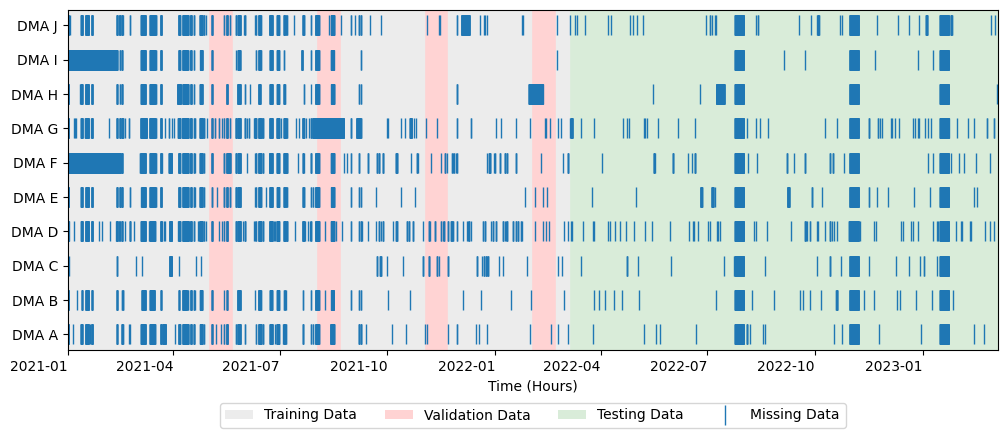

In [ ]:
# data availability not interpolated

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import patch
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Assuming df_inflow is your DataFrame and the necessary columns are already set
# col1 = 'DMA A'

plt.figure()

# Define the validation and testing periods
split_len_days = 21
val_split_1_start = pd.Timestamp('2021-05-01')
val_split_1_end = val_split_1_start + pd.Timedelta(days=split_len_days)
val_split_2_start = pd.Timestamp('2021-08-01')
val_split_2_end = val_split_2_start + pd.Timedelta(days=split_len_days)
val_split_3_start = pd.Timestamp('2021-11-01')
val_split_3_end = val_split_3_start + pd.Timedelta(days=split_len_days)
val_split_4_start = pd.Timestamp('2022-02-01')
val_split_4_end = val_split_4_start + pd.Timedelta(days=split_len_days)
one_hour = pd.Timedelta(hours=1)
alphas = 1 # 0.15

# Testing data start
test_split_start = pd.Timestamp('2022-03-05')

for dma_i, col in enumerate(df_inflow.columns):
    df_test = df_inflow.copy()[col]
    # df_test.interpolate(limit=3, inplace=True)
    df_test.drop(df_test[df_test.notna()].index, inplace=True)
    df_test[df_test.isna()] = 1*dma_i
    df_test.plot(linewidth=0, marker='|', figsize=(12,5), color='tab:blue', markersize=15)#, markeredgewidth=1)

# Adding the vertical spans for the validation and testing periods
plt.axvspan(val_split_1_start, val_split_1_end, color='#ffd3d3', alpha=alphas)
plt.axvspan(val_split_2_start, val_split_2_end, color='#ffd3d3', alpha=alphas)
plt.axvspan(val_split_3_start, val_split_3_end, color='#ffd3d3', alpha=alphas)
plt.axvspan(val_split_4_start, val_split_4_end, color='#ffd3d3', alpha=alphas)

plt.axvspan(test_split_start, df_inflow.index[-1], color='#d9ecd9', alpha=alphas)

# Making uncolored areas for training data
plt.axvspan(df_inflow.index[0].tz_localize(None), val_split_1_start-one_hour, color='#ececec', alpha=alphas)
plt.axvspan(val_split_1_end+one_hour, val_split_2_start-one_hour, color='#ececec', alpha=alphas)
plt.axvspan(val_split_2_end+one_hour, val_split_3_start-one_hour, color='#ececec', alpha=alphas)
plt.axvspan(val_split_3_end+one_hour, val_split_4_start-one_hour, color='#ececec', alpha=alphas)
plt.axvspan(val_split_4_end+one_hour, test_split_start-one_hour, color='#ececec', alpha=alphas)
plt.xlim(df_inflow.index[0].tz_localize(None), df_inflow.index[-1].tz_localize(None))
plt.xlabel('Time (Hours)')
# y ticks is A, B, C, D, E, F, G, H, I, J
plt.yticks(np.arange(0, 10, 1), [dma[:5] for dma in df_inflow.columns])
plt.xticks(rotation=0)
legend_elements = [Patch(facecolor='#ececec', alpha=alphas, label='Training Data'),
                   Patch(facecolor='#ffd3d3', alpha=alphas, label='Validation Data'),
                   Patch(facecolor='#d9ecd9', alpha=alphas, label='Testing Data'),
                   Line2D([0], [0], color='tab:blue', lw=0, marker='|', markersize=15, label='Missing Data')]

# trotate x
# make extra space on the bottom for the legend

plt.legend(handles=legend_elements, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.25))
# plt.title('Data availability for each District Metered Area (DMA)')

# Show the plot
plt.show()


In [ ]:
df_test[df_test.index <  val_split_1_start.tz_localize('UTC')]

Date-time CET-CEST (DD/MM/YYYY HH:mm)
2020-12-31 23:00:00+00:00    9.0
2021-01-01 00:00:00+00:00    9.0
2021-01-01 01:00:00+00:00    9.0
2021-01-01 02:00:00+00:00    9.0
2021-01-01 03:00:00+00:00    9.0
                            ... 
2021-04-25 09:00:00+00:00    9.0
2021-04-25 10:00:00+00:00    9.0
2021-04-25 11:00:00+00:00    9.0
2021-04-25 12:00:00+00:00    9.0
2021-04-25 13:00:00+00:00    9.0
Name: DMA J: Commerical/industrial district close to the port, Length: 361, dtype: float64

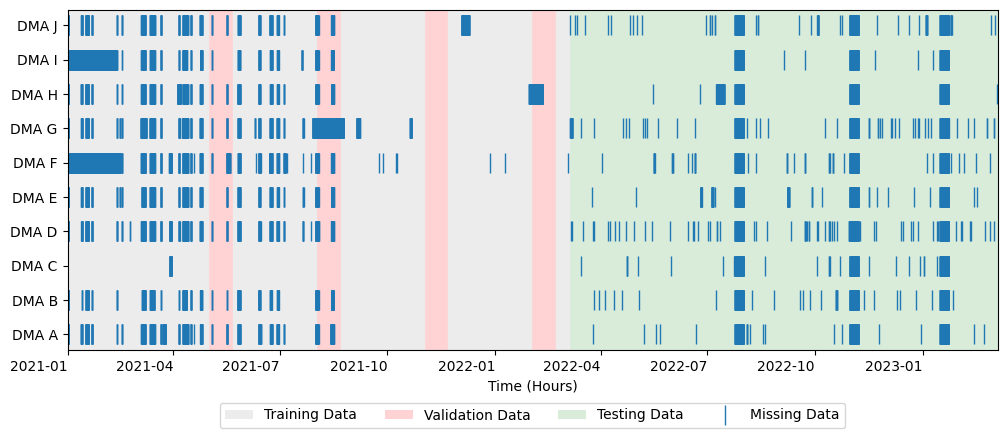

In [ ]:
# interpolated data availability interpolated

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure()

# Define the validation and testing periods
split_len_days = 21
val_split_1_start = pd.Timestamp('2021-05-01')
val_split_1_end = val_split_1_start + pd.Timedelta(days=split_len_days)
val_split_2_start = pd.Timestamp('2021-08-01')
val_split_2_end = val_split_2_start + pd.Timedelta(days=split_len_days)
val_split_3_start = pd.Timestamp('2021-11-01')
val_split_3_end = val_split_3_start + pd.Timedelta(days=split_len_days)
val_split_4_start = pd.Timestamp('2022-02-01')
val_split_4_end = val_split_4_start + pd.Timedelta(days=split_len_days)
one_hour = pd.Timedelta(hours=1)
alphas = 1 # 0.15

# Testing data start
test_split_start = pd.Timestamp('2022-03-05')

for dma_i, col in enumerate(df_inflow.columns):
    df_test = df_inflow.copy()[col]
    df_test[df_test.index <  test_split_start.tz_localize('UTC')]=df_test[df_test.index <  test_split_start.tz_localize('UTC')].interpolate(limit=3)
    # df_test.interpolate(limit=3, inplace=True)
    df_test.drop(df_test[df_test.notna()].index, inplace=True)
    df_test[df_test.isna()] = 1*dma_i
    df_test.plot(linewidth=0, marker='|', figsize=(12,5), color='tab:blue', markersize=15)#, markeredgewidth=1)

# Adding the vertical spans for the validation and testing periods
plt.axvspan(val_split_1_start, val_split_1_end, color='#ffd3d3', alpha=alphas)
plt.axvspan(val_split_2_start, val_split_2_end, color='#ffd3d3', alpha=alphas)
plt.axvspan(val_split_3_start, val_split_3_end, color='#ffd3d3', alpha=alphas)
plt.axvspan(val_split_4_start, val_split_4_end, color='#ffd3d3', alpha=alphas)

plt.axvspan(test_split_start, df_inflow.index[-1], color='#d9ecd9', alpha=alphas)

# Making uncolored areas for training data
plt.axvspan(df_inflow.index[0].tz_localize(None), val_split_1_start-one_hour, color='#ececec', alpha=alphas)
plt.axvspan(val_split_1_end+one_hour, val_split_2_start-one_hour, color='#ececec', alpha=alphas)
plt.axvspan(val_split_2_end+one_hour, val_split_3_start-one_hour, color='#ececec', alpha=alphas)
plt.axvspan(val_split_3_end+one_hour, val_split_4_start-one_hour, color='#ececec', alpha=alphas)
plt.axvspan(val_split_4_end+one_hour, test_split_start-one_hour, color='#ececec', alpha=alphas)
plt.xlim(df_inflow.index[0].tz_localize(None), df_inflow.index[-1].tz_localize(None))
plt.xlabel('Time (Hours)')
# y ticks is A, B, C, D, E, F, G, H, I, J
plt.yticks(np.arange(0, 10, 1), [dma[:5] for dma in df_inflow.columns])
plt.xticks(rotation=0)
legend_elements = [Patch(facecolor='#ececec', alpha=alphas, label='Training Data'),
                   Patch(facecolor='#ffd3d3', alpha=alphas, label='Validation Data'),
                   Patch(facecolor='#d9ecd9', alpha=alphas, label='Testing Data'),
                   Line2D([0], [0], color='tab:blue', lw=0, marker='|', markersize=15, label='Missing Data')]


plt.legend(handles=legend_elements, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.25))
# plt.title('Data availability for each District Metered Area (DMA)')

# Show the plot
plt.show()

In [ ]:
# compute percentage of missing values
missing = df_inflow.isnull().sum() / df_inflow.shape[0] * 100
missing

DMA A (L/s)     6.727540
DMA B (L/s)     5.830185
DMA C (L/s)     3.195844
DMA D (L/s)     7.619647
DMA E (L/s)     6.622586
DMA F (L/s)    12.625945
DMA G (L/s)    10.553107
DMA H (L/s)     8.485516
DMA I (L/s)    10.568850
DMA J (L/s)     7.462217
dtype: float64

In [ ]:
# check how many duplicate datetimes there are in the data and where they are
w=2
for i in range(len(df_inflow)-1):
    if df_inflow.index.duplicated()[i]:
        display('duplicate datetime at:', df_inflow.iloc[i-2:i+2])


'duplicate datetime at:'

DMA A: Hospital district  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                             
2021-10-31 01:00:00                                      6.6825   
2021-10-31 02:00:00                                      6.5500   
2021-10-31 02:00:00                                      6.4825   
2021-10-31 03:00:00                                      6.2250   

                                       DMA B: Residential district in the countryside  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                   
2021-10-31 01:00:00                                                            7.1200   
2021-10-31 02:00:00                                                            7.3100   
2021-10-31 02:00:00                                                            7.2525   
2021-10-31 03:00:00                                                            7.1350   

                                       DMA C: Residential District in the countryside  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                   
2021-10-31 01:00:00                                                            2.4525   
2021-10-31 02:00:00                                                            2.2075   
2021-10-31 02:00:00                                                            2.2400   
2021-10-31 03:00:00                                                            2.2275   

                                       DMA D: Suburban residential/commercial district  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                    
2021-10-31 01:00:00                                                            25.5125   
2021-10-31 02:00:00                                                            34.8350   
2021-10-31 02:00:00                                                            52.1125   
2021-10-31 03:00:00                                                            37.5750   

                                       DMA E: Residential/commercial district close to the city centre  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                                    
2021-10-31 01:00:00                                                              55.1825                 
2021-10-31 02:00:00                                                              53.9300                 
2021-10-31 02:00:00                                                              50.9900                 
2021-10-31 03:00:00                                                              50.8500                 

                                       DMA F: Suburban district including sport facilities and office buildings  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                                             
2021-10-31 01:00:00                                                               6.3600                          
2021-10-31 02:00:00                                                               4.8225                          
2021-10-31 02:00:00                                                               5.2550                          
2021-10-31 03:00:00                                                               5.2425                          

                                       DMA G: Residential district close to the city centre  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                         
2021-10-31 01:00:00                                                              17.1300      
2021-10-31 02:00:00                                                              15.4500      
2021-10-31 02:00:00                                                              15.3675      
2021-10-31 03:00:00                                                              15.4325      

                                       DMA H: City centre district  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                   

'duplicate datetime at:'

DMA A: Hospital district  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                             
2022-10-30 01:00:00                                      4.9050   
2022-10-30 02:00:00                                      4.4600   
2022-10-30 02:00:00                                      4.7675   
2022-10-30 03:00:00                                      4.4950   

                                       DMA B: Residential district in the countryside  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                   
2022-10-30 01:00:00                                                            7.8625   
2022-10-30 02:00:00                                                            7.8100   
2022-10-30 02:00:00                                                            7.6400   
2022-10-30 03:00:00                                                            7.7200   

                                       DMA C: Residential District in the countryside  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                   
2022-10-30 01:00:00                                                            2.0650   
2022-10-30 02:00:00                                                            1.8525   
2022-10-30 02:00:00                                                            1.7800   
2022-10-30 03:00:00                                                            1.8750   

                                       DMA D: Suburban residential/commercial district  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                    
2022-10-30 01:00:00                                                              22.51   
2022-10-30 02:00:00                                                                NaN   
2022-10-30 02:00:00                                                                NaN   
2022-10-30 03:00:00                                                                NaN   

                                       DMA E: Residential/commercial district close to the city centre  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                                    
2022-10-30 01:00:00                                                              65.9025                 
2022-10-30 02:00:00                                                              62.9800                 
2022-10-30 02:00:00                                                              62.2250                 
2022-10-30 03:00:00                                                              61.1325                 

                                       DMA F: Suburban district including sport facilities and office buildings  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                                             
2022-10-30 01:00:00                                                               7.3125                          
2022-10-30 02:00:00                                                               4.4775                          
2022-10-30 02:00:00                                                               6.1125                          
2022-10-30 03:00:00                                                               6.3700                          

                                       DMA G: Residential district close to the city centre  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                         
2022-10-30 01:00:00                                                              21.6000      
2022-10-30 02:00:00                                                              20.8900      
2022-10-30 02:00:00                                                              21.0050      
2022-10-30 03:00:00                                                              19.9425      

                                       DMA H: City centre district  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                   

In [ ]:
# chck how many missing datetimes there are in the data
for i in range(len(df_inflow)-1):
    dt = df_inflow.index[i+1] - df_inflow.index[i]
    if dt > pd.Timedelta('1h'):
        display('missing datetime at:', df_inflow.iloc[i-1:i+3])


'missing datetime at:'

DMA A: Hospital district  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                             
2021-03-28 00:00:00                                      5.0125   
2021-03-28 01:00:00                                      4.7925   
2021-03-28 03:00:00                                      4.5875   
2021-03-28 04:00:00                                      4.8275   

                                       DMA B: Residential district in the countryside  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                   
2021-03-28 00:00:00                                                            8.6850   
2021-03-28 01:00:00                                                            8.5275   
2021-03-28 03:00:00                                                            8.2850   
2021-03-28 04:00:00                                                            8.4250   

                                       DMA C: Residential District in the countryside  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                   
2021-03-28 00:00:00                                                            3.5625   
2021-03-28 01:00:00                                                            3.5500   
2021-03-28 03:00:00                                                            3.4250   
2021-03-28 04:00:00                                                            3.0850   

                                       DMA D: Suburban residential/commercial district  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                    
2021-03-28 00:00:00                                                            27.8675   
2021-03-28 01:00:00                                                            27.4250   
2021-03-28 03:00:00                                                            55.9550   
2021-03-28 04:00:00                                                            31.4950   

                                       DMA E: Residential/commercial district close to the city centre  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                                    
2021-03-28 00:00:00                                                              60.3650                 
2021-03-28 01:00:00                                                              55.3175                 
2021-03-28 03:00:00                                                              51.6250                 
2021-03-28 04:00:00                                                              52.1175                 

                                       DMA F: Suburban district including sport facilities and office buildings  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                                             
2021-03-28 00:00:00                                                               5.2875                          
2021-03-28 01:00:00                                                               5.8025                          
2021-03-28 03:00:00                                                               7.7325                          
2021-03-28 04:00:00                                                                  NaN                          

                                       DMA G: Residential district close to the city centre  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                         
2021-03-28 00:00:00                                                              16.8375      
2021-03-28 01:00:00                                                              14.6525      
2021-03-28 03:00:00                                                              11.2175      
2021-03-28 04:00:00                                                                  NaN      

                                       DMA H: City centre district  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                   

'missing datetime at:'

DMA A: Hospital district  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                             
2022-03-27 00:00:00                                      4.3100   
2022-03-27 01:00:00                                      4.2775   
2022-03-27 03:00:00                                      4.0200   
2022-03-27 04:00:00                                      4.0375   

                                       DMA B: Residential district in the countryside  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                   
2022-03-27 00:00:00                                                            7.5750   
2022-03-27 01:00:00                                                            7.3650   
2022-03-27 03:00:00                                                            7.1225   
2022-03-27 04:00:00                                                            7.1800   

                                       DMA C: Residential District in the countryside  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                   
2022-03-27 00:00:00                                                            2.8075   
2022-03-27 01:00:00                                                            2.9500   
2022-03-27 03:00:00                                                            2.7375   
2022-03-27 04:00:00                                                            2.5100   

                                       DMA D: Suburban residential/commercial district  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                    
2022-03-27 00:00:00                                                            27.0425   
2022-03-27 01:00:00                                                            28.4525   
2022-03-27 03:00:00                                                            35.6525   
2022-03-27 04:00:00                                                            55.0425   

                                       DMA E: Residential/commercial district close to the city centre  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                                    
2022-03-27 00:00:00                                                              59.6650                 
2022-03-27 01:00:00                                                              53.3125                 
2022-03-27 03:00:00                                                              52.6900                 
2022-03-27 04:00:00                                                              52.8625                 

                                       DMA F: Suburban district including sport facilities and office buildings  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                                             
2022-03-27 00:00:00                                                               7.3550                          
2022-03-27 01:00:00                                                               9.5050                          
2022-03-27 03:00:00                                                               9.2525                          
2022-03-27 04:00:00                                                               6.1650                          

                                       DMA G: Residential district close to the city centre  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                                                         
2022-03-27 00:00:00                                                               20.545      
2022-03-27 01:00:00                                                               21.410      
2022-03-27 03:00:00                                                               17.190      
2022-03-27 04:00:00                                                               17.530      

                                       DMA H: City centre district  \
Date-time CET-CEST (DD/MM/YYYY HH:mm)                   

In [31]:
# make boxplot per hour of a day, starting at 00:00, of the inflow data, per DMA
df = df_inflow.copy()

# remove duplicate entries of df
# Remove duplicates based on the index
df = df[~df.index.duplicated(keep='first')]

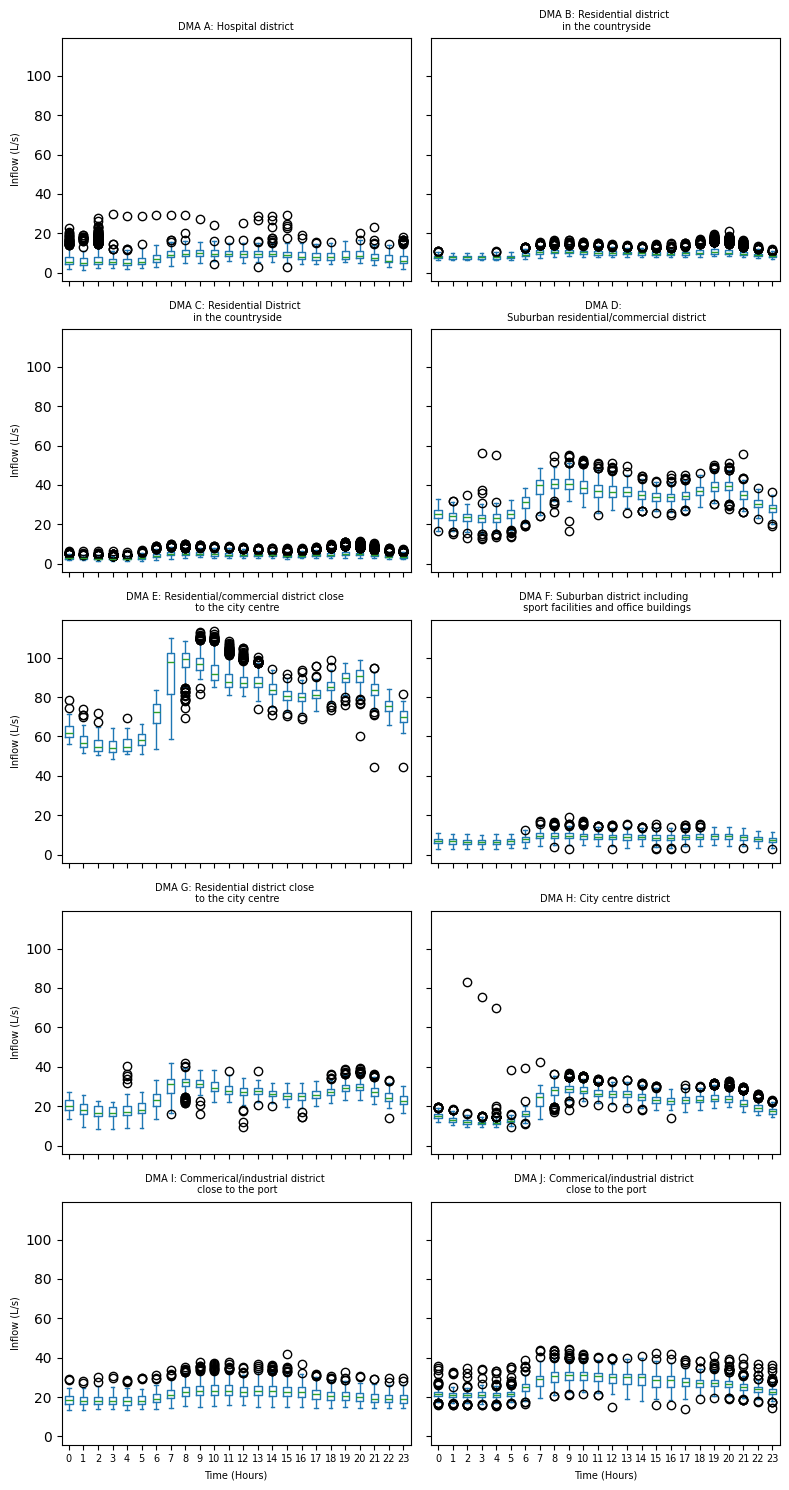

In [34]:
# make subplots with 5 rows and 2 columns
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharey=True, sharex=True)

for i, ax in enumerate(axes.flatten()):
    col = df.columns[i]
    df.set_index(df.index.hour, append=True)[col].unstack().plot.box(ax=ax)
    ax.set_title(new_column_names[i], fontsize=7)
    if i>=8:
        ax.set_xlabel('Time (Hours)', fontsize=7)
        ax.set_xticks(np.arange(1, 25, 1))  # Control the xtick placement
        ax.tick_params(axis='x', labelsize=7)
        # ax.set_xticklabels(np.arange(0, 24, 1), fontsize=7)
    # ax.set_xlabel('Time (Hours)', fontsize=7)
    ax.set_ylabel('Inflow (L/s)', fontsize=7)
    ax.set_title('{}'.format(new_column_names_with_newlines[i]), size=7)
    # ax.set_xticklabels(np.arange(0, 24, 1), fontsize=7)
plt.tight_layout()

plt.show()



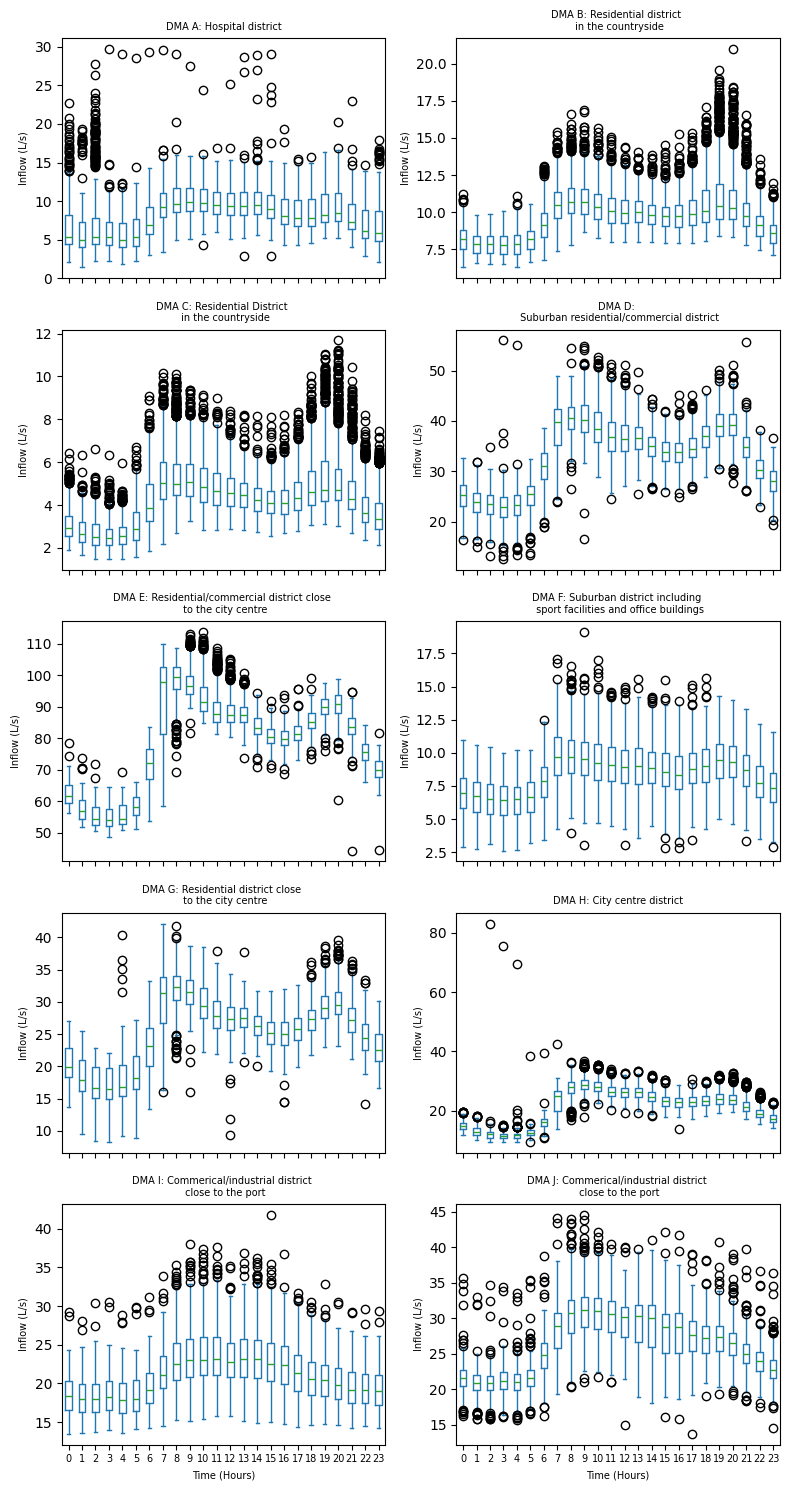

In [35]:
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharey=False, sharex=True)

for i, ax in enumerate(axes.flatten()):
    col = df.columns[i]
    df.set_index(df.index.hour, append=True)[col].unstack().plot.box(ax=ax)
    ax.set_title(new_column_names[i], fontsize=7)
    if i>=8:
        ax.set_xlabel('Time (Hours)', fontsize=7)
        ax.set_xticks(np.arange(1, 25, 1))  # Control the xtick placement
        ax.tick_params(axis='x', labelsize=7)
        # ax.set_xticklabels(np.arange(0, 24, 1), fontsize=7)
    # ax.set_xlabel('Time (Hours)', fontsize=7)
    ax.set_ylabel('Inflow (L/s)', fontsize=7)
    ax.set_title('{}'.format(new_column_names_with_newlines[i]), size=7)
    # ax.set_xticklabels(np.arange(0, 24, 1), fontsize=7)
plt.tight_layout()

plt.show()

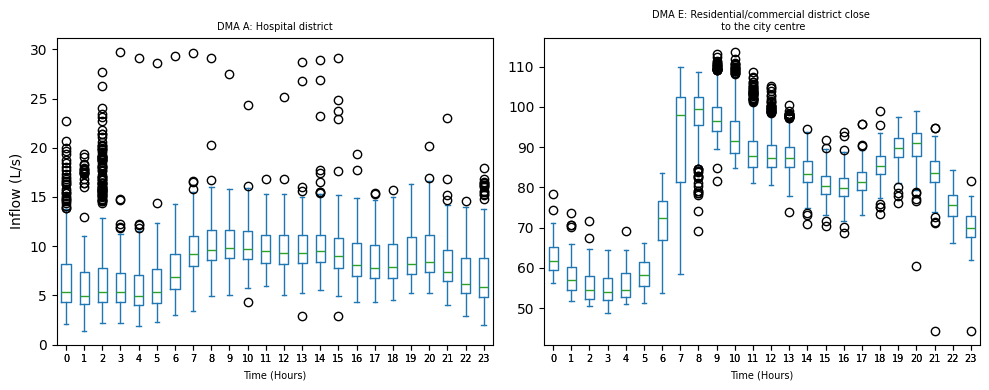

In [36]:
# plot DMA A and DMA E (i=0, i = 4)
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False, sharex=True)

for i, ax in enumerate(axes.flatten()):
    col = df.columns[i*4]
    df.set_index(df.index.hour, append=True)[col].unstack().plot.box(ax=ax)
    ax.set_title(new_column_names[i*4], fontsize=7)
    ax.set_xlabel('Time (Hours)', fontsize=7)
        # ax.set_xticks(np.arange(1, 25, 1))  # Control the xtick placement

    ax.tick_params(axis='x', labelsize=7)
        # ax.set_xticklabels(np.arange(0, 24, 1), fontsize=7)
    # ax.set_xlabel('Time (Hours)', fontsize=7)
    if i==0:
        ax.set_ylabel('Inflow (L/s)')
    ax.set_title('{}'.format(new_column_names_with_newlines[i*4]), size=7)
    # ax.set_xticklabels(np.arange(0, 24, 1), fontsize=7)
fig.tight_layout()

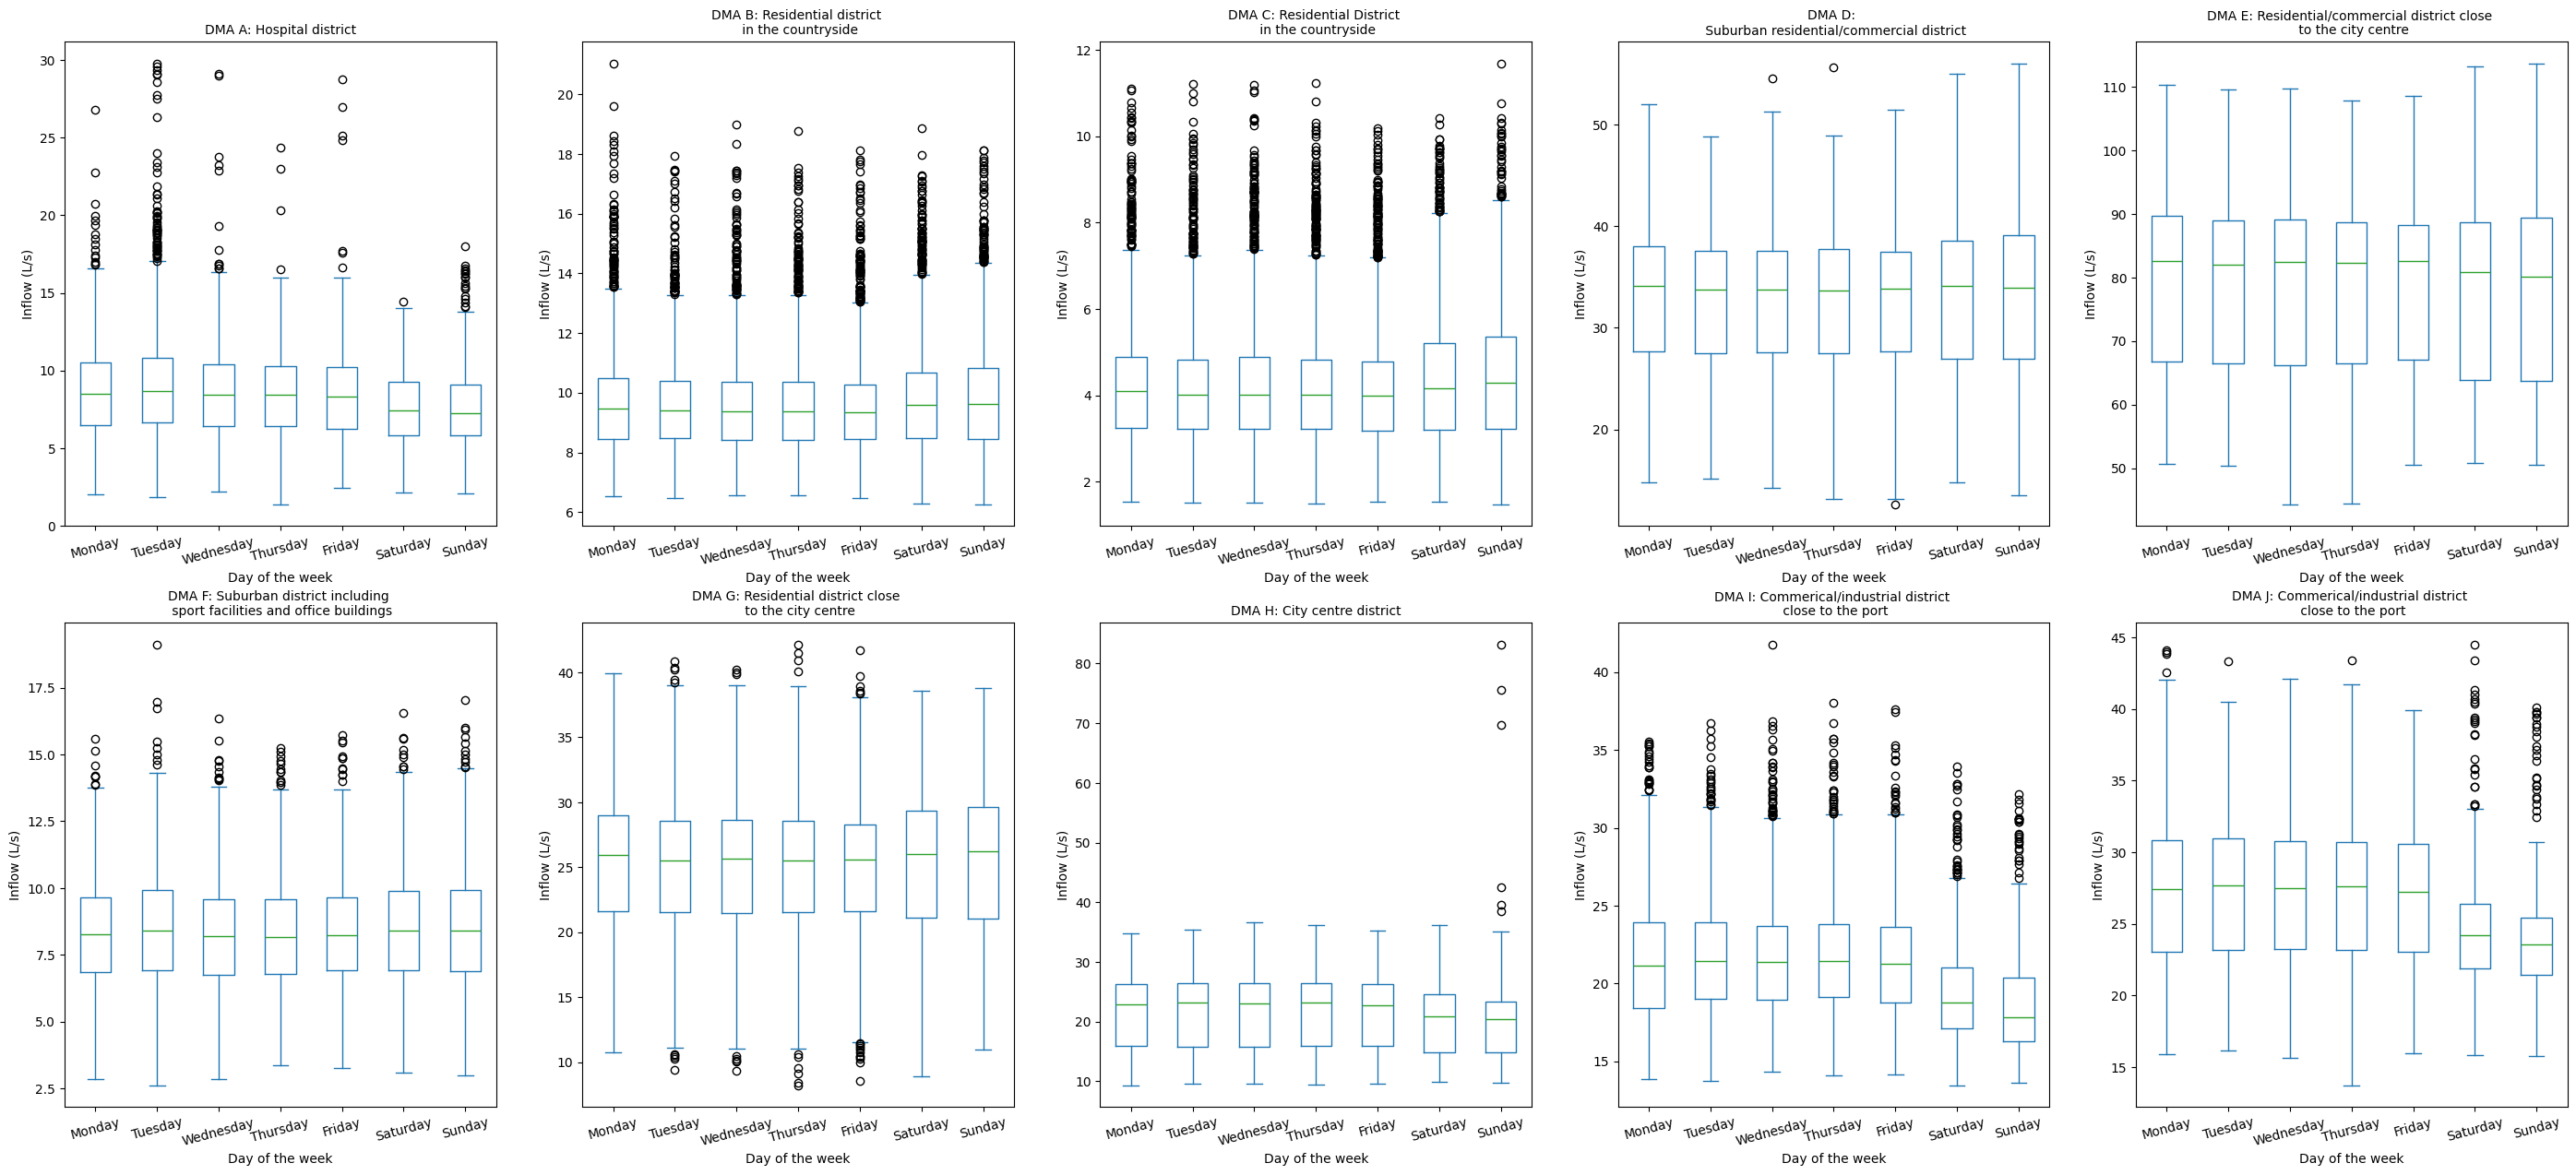

In [37]:
fig, axes = plt.subplots(2, 5, figsize=(35, 15))#, sharey=True)

# Define the names of the week
week_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, ax in enumerate(axes.flatten()):
    col = df.columns[i]
    df.set_index(df.index.dayofweek, append=True)[col].unstack().plot.box(ax=ax)
    ax.set_title(new_column_names[i])
    ax.set_xlabel('Day of the week')
    ax.set_ylabel('Inflow (L/s)')
    ax.set_title('{}'.format(new_column_names_with_newlines[i]), size=10)
    
    # Set the xticks with the names of the week
    ax.set_xticklabels(week_names, rotation=15)

plt.show()


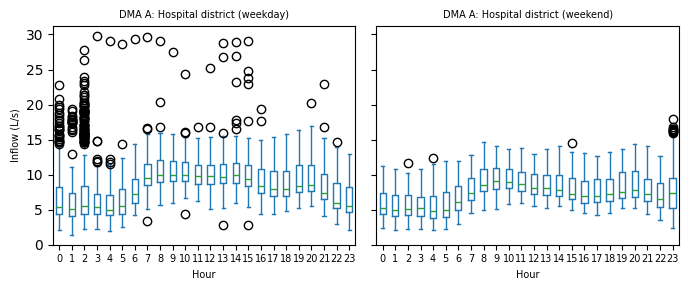

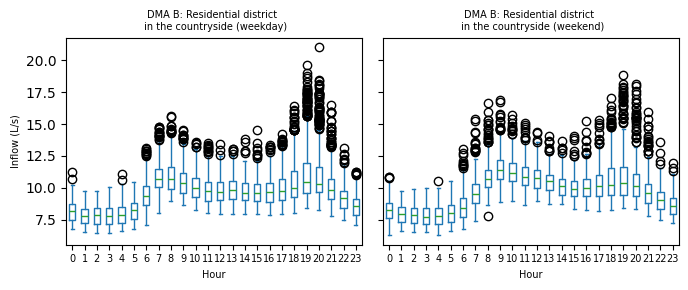

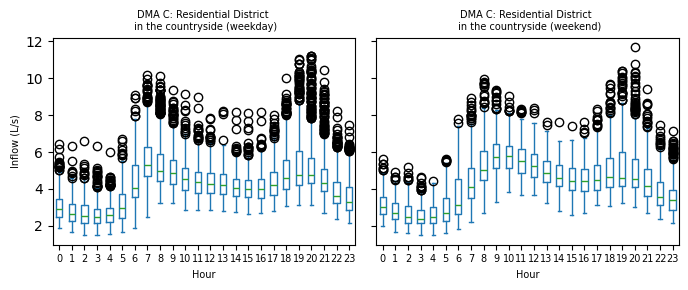

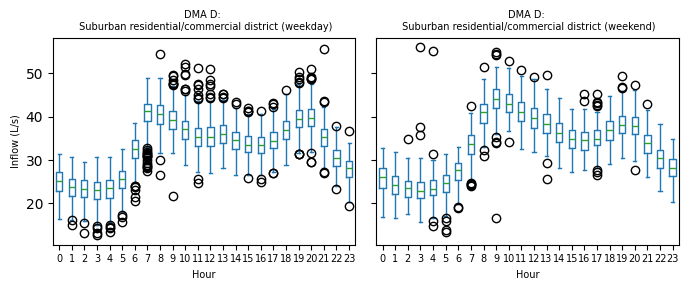

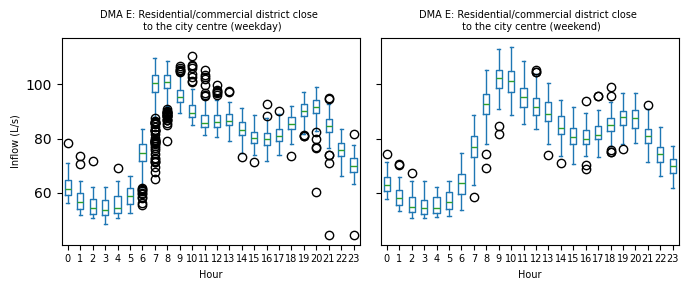

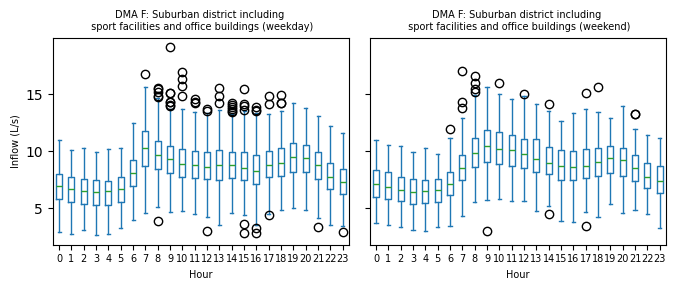

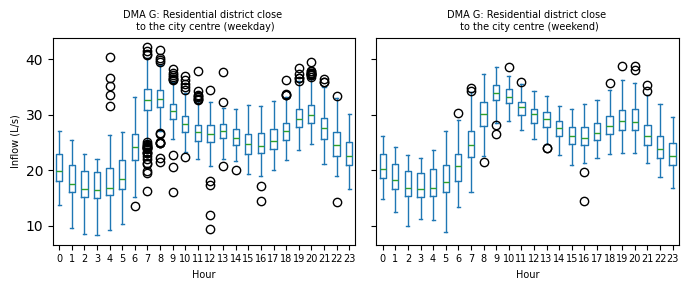

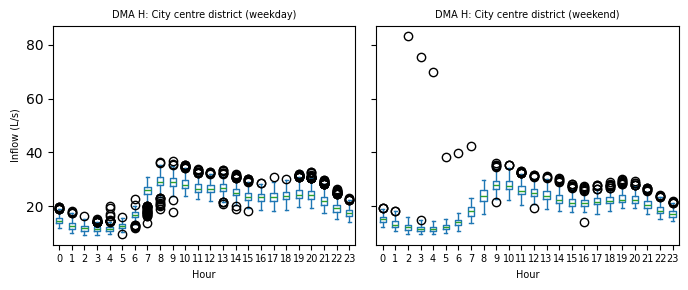

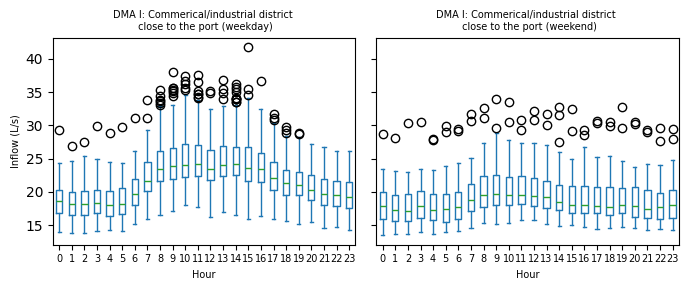

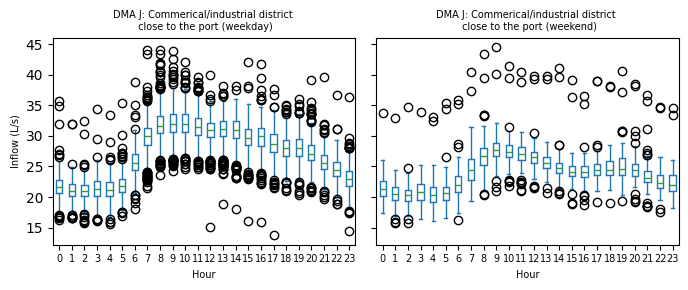

In [38]:
# repeat same for weekend days
df_weekend = df.copy()
df_weekend = df_weekend[df_weekend.index.dayofweek >= 5]
df_weekday = df.copy()
df_weekday = df_weekday[df_weekday.index.dayofweek < 5]
ymin, ymax = df.min().min(), df.max().max()
# make daily boxsplots per two subplots

# make in ../show_results/ a folder named boxplots if it doesnt exist
if not os.path.exists('../show_results/boxplots'):
    os.makedirs('../show_results/boxplots')

for i, name in enumerate(new_column_names_with_newlines):
    fig, axes = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
    df_weekday.set_index(df_weekday.index.hour, append=True)[df_weekday.columns[i]].unstack().plot.box(ax=axes[0])
    axes[0].set_title(f'{name} (weekday)', fontsize=7)
    axes[0].set_xlabel('Hour', fontsize=7)
    axes[0].set_ylabel('Inflow (L/s)', fontsize=7)
    axes[0].tick_params(axis='x', labelsize=7)

    # axes[0].set_ylim(ymin, ymax)
    df_weekend.set_index(df_weekend.index.hour, append=True)[df_weekend.columns[i]].unstack().plot.box(ax=axes[1])
    axes[1].set_title(f'{name} (weekend)', fontsize=7)
    axes[1].set_xlabel('Hour', fontsize=7)
    axes[1].set_ylabel('Inflow (L/s)', fontsize=7)
    axes[1].tick_params(axis='x', labelsize=7)
    # axes[1].set_ylim(ymin, ymax)
    fig.tight_layout()
    plt.show()

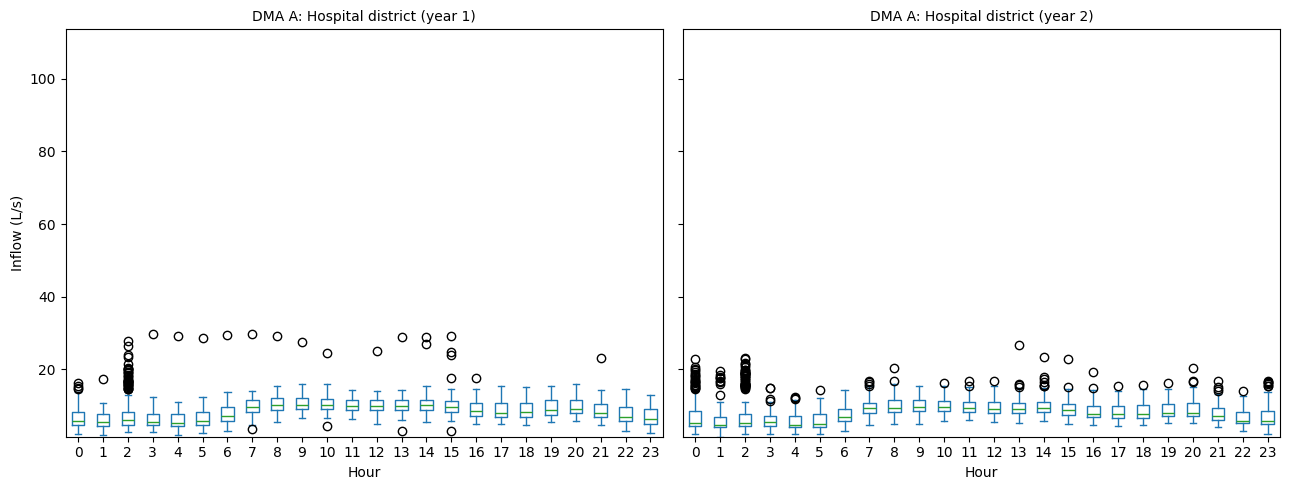

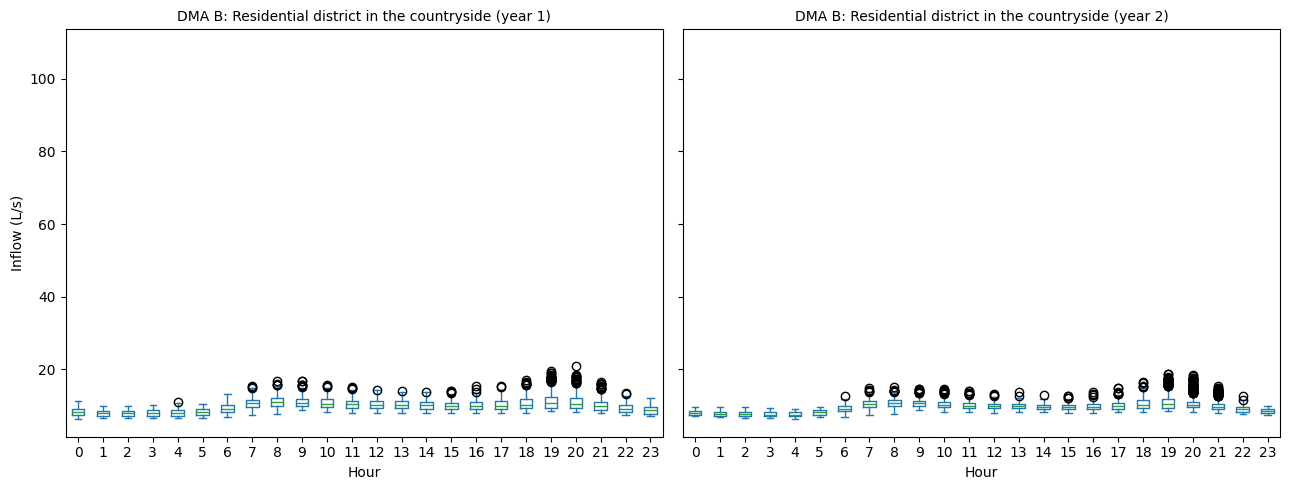

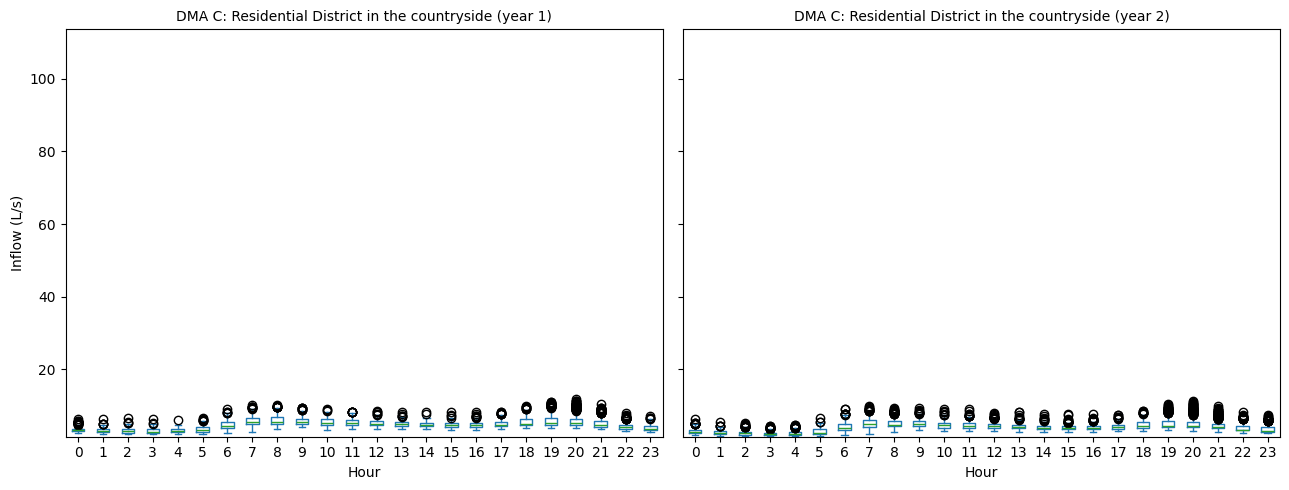

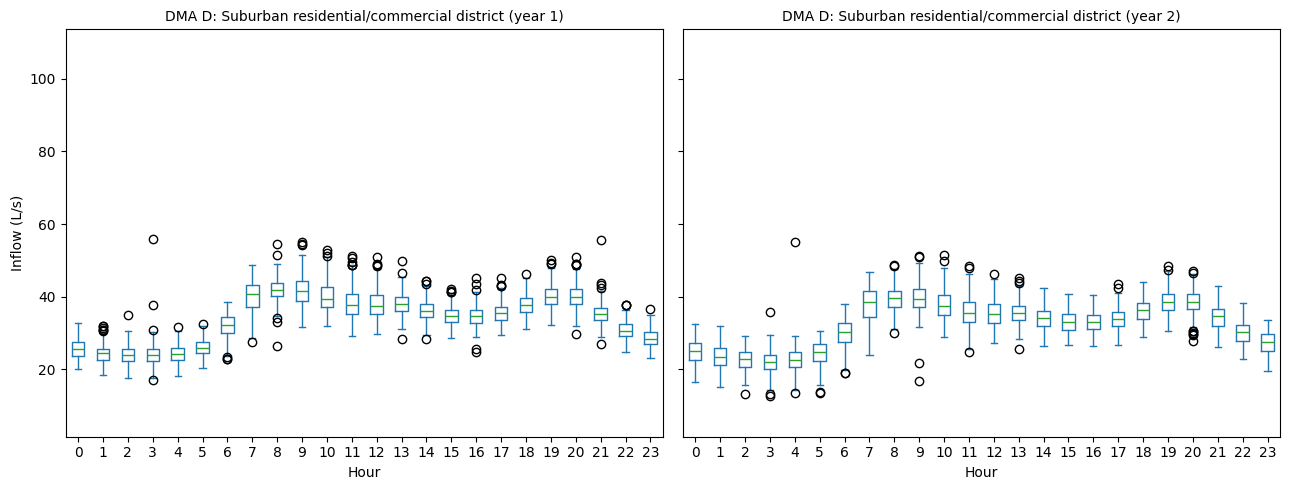

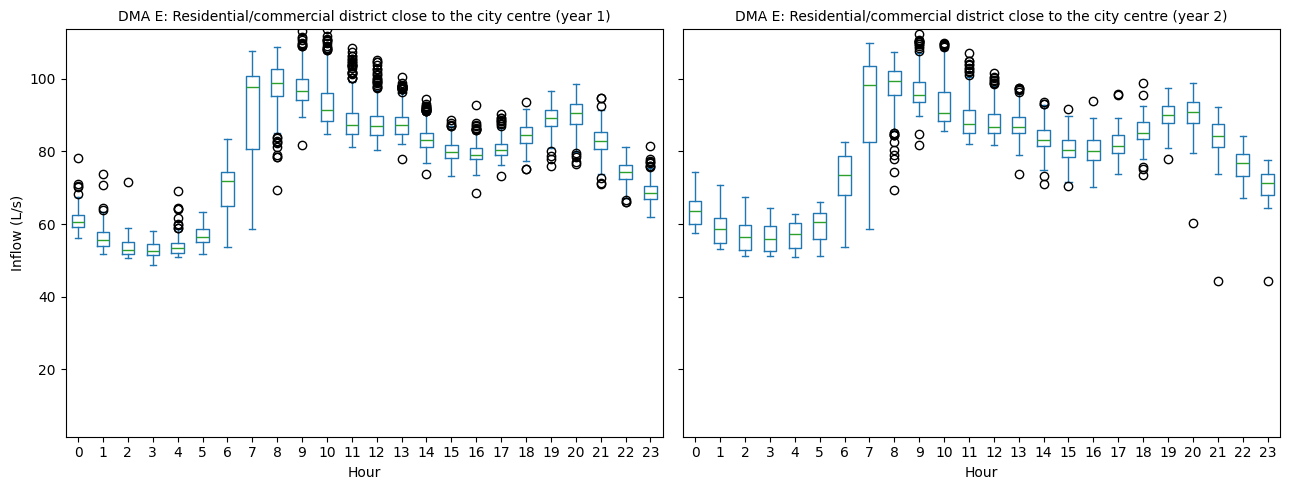

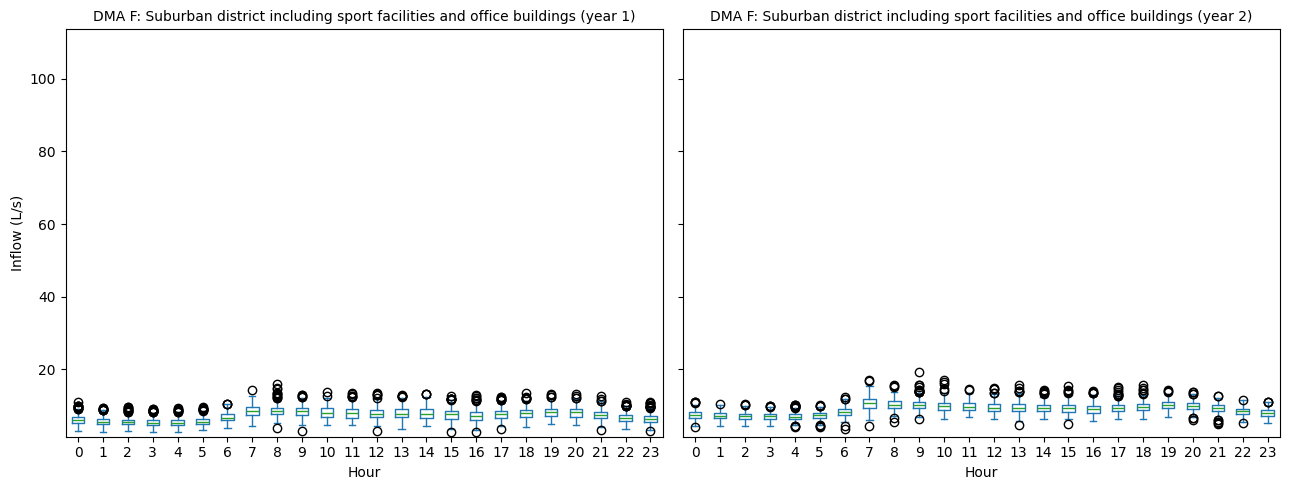

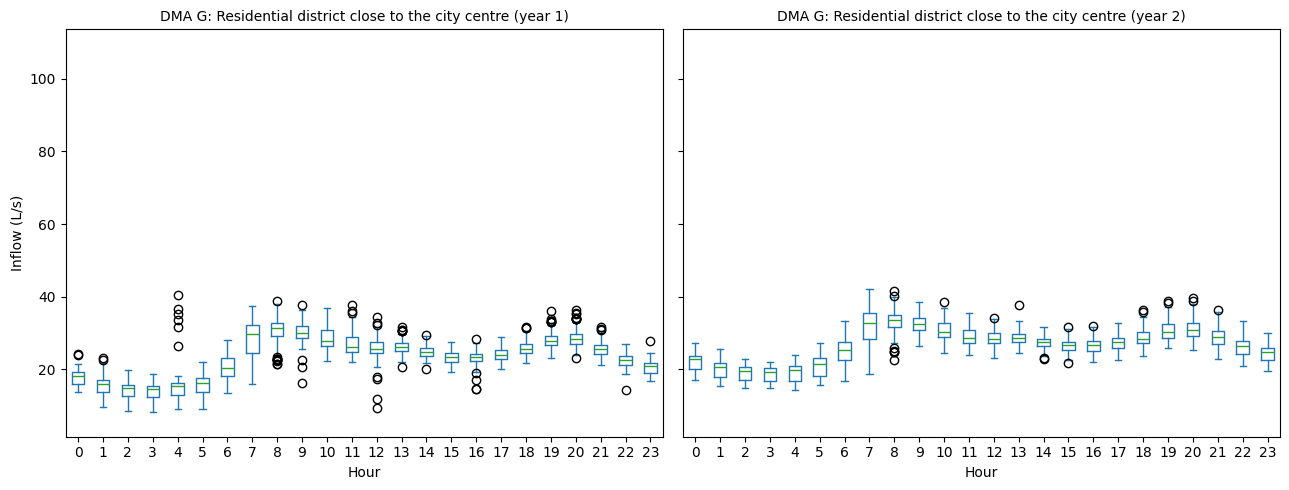

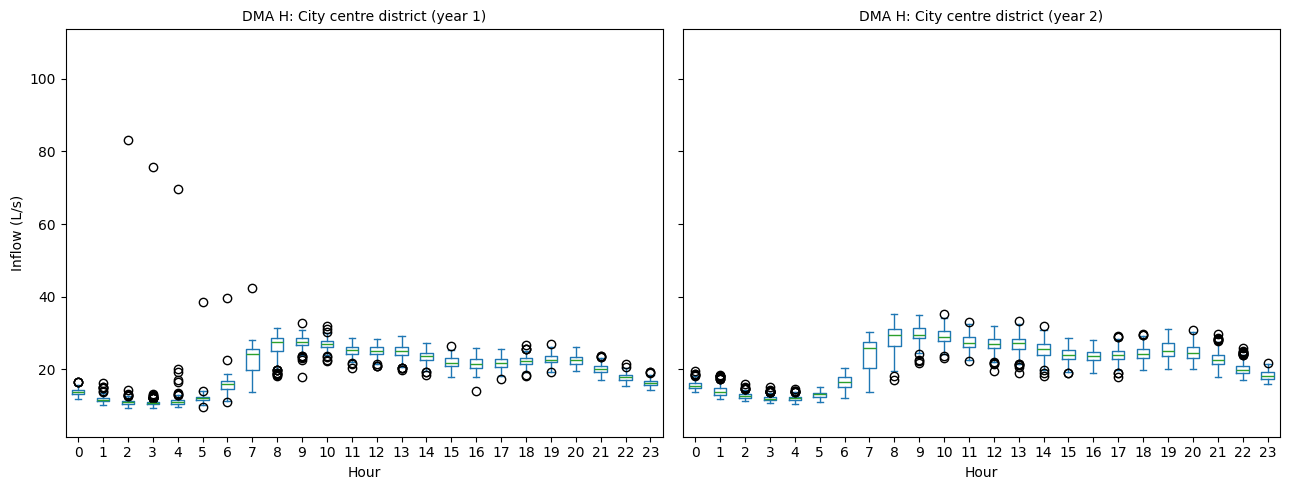

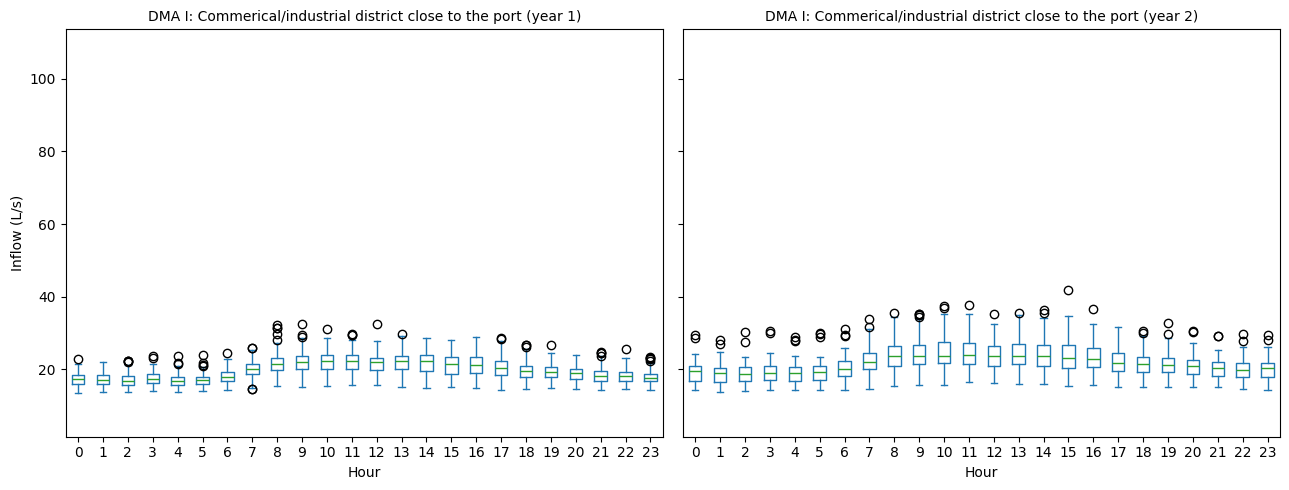

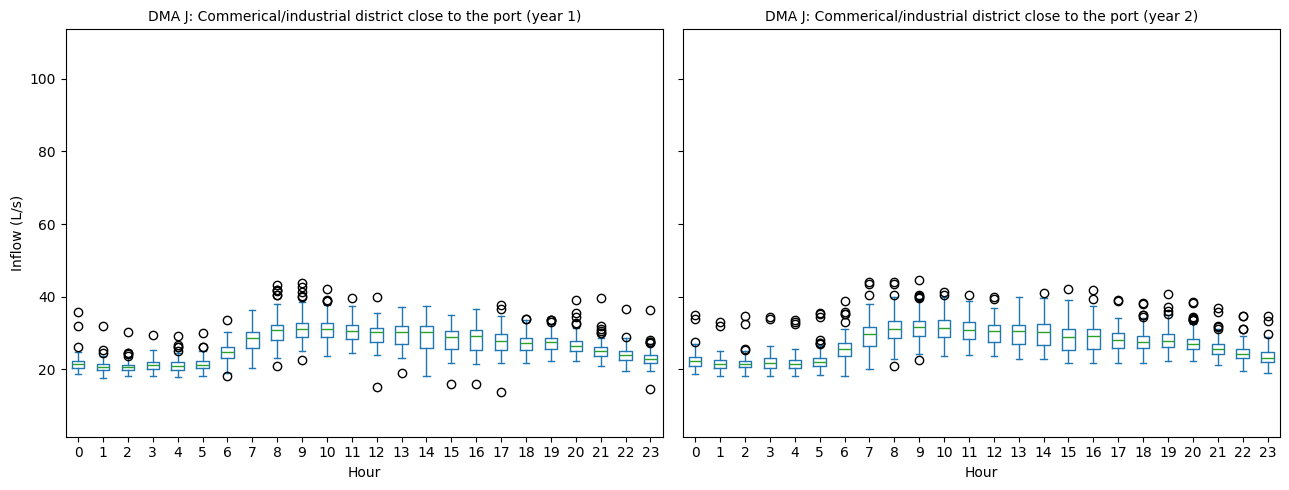

In [39]:
# same as above but with year 1 and year 2 data
for i, name in enumerate(new_column_names):
    fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
    df_y1 = df[:'2022-01-01']
    df_y2 = df['2022-01-01':'2023-01-01']
    df_y1.set_index(df_y1.index.hour, append=True)[df_y1.columns[i]].unstack().plot.box(ax=axes[0])    
    axes[0].set_title(f'{name} (year 1)', fontsize='medium')
    axes[0].set_xlabel('Hour')
    axes[0].set_ylabel('Inflow (L/s)')
    axes[0].set_ylim(ymin, ymax)
    df_y2.set_index(df_y2.index.hour, append=True)[df_y2.columns[i]].unstack().plot.box(ax=axes[1])
    axes[1].set_title(f'{name} (year 2)', fontsize='medium')
    axes[1].set_xlabel('Hour')
    axes[1].set_ylabel('Inflow (L/s)')
    axes[0].set_ylim(ymin, ymax)
    fig.tight_layout()
    

